# Abnormal HbA1c Results During COVID-19

This notebook describes deviations in HbA1c test results during the COVID-19 pandemic at large and by specific demographic groups. The following measures are reported: 
1. Absolute count of tests and abnormal results (by age, sex, ethnicity, region, IMD, diabetes type, learning disability, mental illness diagnosis)
2. Percentage of abnormal results of total number of tests taken (by age, sex, ethnicity, region, IMD, diabetes type, learning disability, mental illness diagnosis)
3. Absolute count of tests and abnormal results of tests taken by patients with type 1 diabetes (by age, sex, ethnicity, region, IMD, learning disability, mental illness diagnosis)
4. Percentage of abnormal results of tests taken by patients with type 1 diabetes (by age, sex, ethnicity, region, IMD, learning disability, mental illness diagnosis)
5. Absolute count of tests and abnormal results of tests taken by patients with type 2 diabetes (by age, sex, ethnicity, region, IMD, learning disability, mental illness diagnosis)
6. Percentage of abnormal results of tests taken by patients with type 2 diabetes (by age, sex, ethnicity, region, IMD, learning disability, mental illness diagnosis)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', None)

In [2]:
# Import measures
def import_df(f_path):
    df = pd.read_csv("../output/data/{}.csv".format(f_path))
    # Sort data by date
    df['date'] = pd.to_datetime(df.date)
    df.sort_values(by='date')
    # Create percent of population
    df['pct'] = df['value']*100
    return df

# Filter data
def filter_df(df, flag):
    return df.loc[df[flag] == 1]

# Create charts
def create_chart(measure, ylabel, title, group, df, y_min):
    plt.figure(figsize = (15,8))
    # Plot error bars if full population chart
    if (
        group == 'population'
    ):
        ax = sns.lineplot(x = 'date', y = measure, data = df)
    else:
        ax = sns.lineplot(x = 'date', y = measure, hue = group, data = df, ci=None)
        ax.legend().set_title(None)
    locs, labels = plt.xticks()
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    if measure != 'population':
        plt.gca().set_ylim(bottom=y_min)
    plt.setp(labels, rotation=65)
    plt.title(title)
    plt.show()
    print('\n')

In [3]:
# Total tests
df_pop = import_df('measure_hba1c_abnormal')
df_dm = import_df('measure_hba1c_abnormal_by_diabetes_type')
df_sex = import_df('measure_hba1c_abnormal_by_sex')
df_age = import_df('measure_hba1c_abnormal_by_age')
df_region = import_df('measure_hba1c_abnormal_by_region')
df_imd = import_df('measure_hba1c_abnormal_by_imd')
df_eth = import_df('measure_hba1c_abnormal_by_ethnicity')
df_mi = import_df('measure_hba1c_abnormal_by_mental_illness')
df_ld = import_df('measure_hba1c_abnormal_by_learning_disability')

In [4]:
# T1 Diabetes
df_pop_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal'),'diabetes_t1')
df_sex_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal_by_sex'),'diabetes_t1')
df_age_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal_by_age'),'diabetes_t1')
df_region_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal_by_region'),'diabetes_t1')
df_imd_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal_by_imd'),'diabetes_t1')
df_eth_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal_by_ethnicity'),'diabetes_t1')
df_mi_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal_by_mental_illness'),'diabetes_t1')
df_ld_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal_by_learning_disability'),'diabetes_t1')

In [5]:
# T2 Diabetes
df_pop_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal'),'diabetes_t2')
df_sex_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal_by_sex'),'diabetes_t2')
df_age_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal_by_age'),'diabetes_t2')
df_region_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal_by_region'),'diabetes_t2')
df_imd_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal_by_imd'),'diabetes_t2')
df_eth_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal_by_ethnicity'),'diabetes_t2')
df_mi_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal_by_mental_illness'),'diabetes_t2')
df_ld_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal_by_learning_disability'),'diabetes_t2')

In [6]:
# Format ethnicity
dict_eth = {1: 'White', 2: 'Mixed', 3: 'Asian',
            4: 'Black', 5: 'Other', np.nan: 'Unknown',
            0: 'Unknown'}
df_eth = df_eth.replace({"ethnicity": dict_eth})
df_eth_t1 = df_eth_t1.replace({"ethnicity": dict_eth})
df_eth_t2 = df_eth_t2.replace({"ethnicity": dict_eth})

In [7]:
# Format learning disability label
dict_ld = {1:'Yes', 0:'No'}
df_ld = df_ld.replace({'learning_disability': dict_ld})
df_ld_t1 = df_ld_t1.replace({'learning_disability': dict_ld})
df_ld_t2 = df_ld_t2.replace({'learning_disability': dict_ld})

In [8]:
# Format diabetes type 
dict_dm_type = {'NO_DM': 'No diabetes', 'T1DM': 'Type 1', 
                'T2DM': 'Type 2', 'UNKNOWN_DM': 'Unknown diabetes'}
df_dm = df_dm.replace({'diabetes_type': dict_dm_type})

In [9]:
# Format IMD 
dict_imd = {0: 'Unknown', 1: '1 Most deprived', 2: '2',
            3: '3', 4: '4', 5: '5 Least deprived'}
df_imd = df_imd.replace({'imd': dict_imd})
df_imd_t1 = df_imd_t1.replace({'imd': dict_imd})
df_imd_t2 = df_imd_t2.replace({'imd': dict_imd})

In [10]:
# Remove age 0-15 group from df_age_t2
df_age_t2 = df_age_t2.loc[df_age_t2.age_group != '0-15']

## Count of Abnormal Results

In [11]:
# Specify y-axis min & max for consistency across charts
y_min = 0

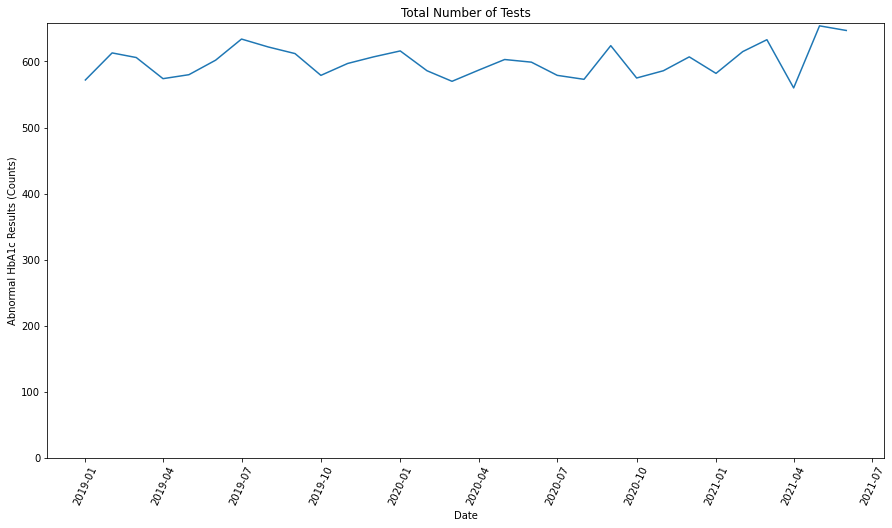

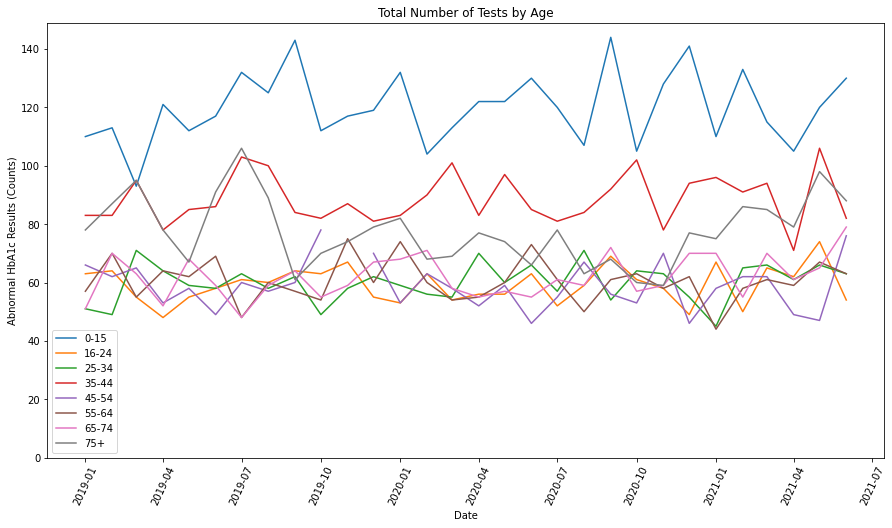

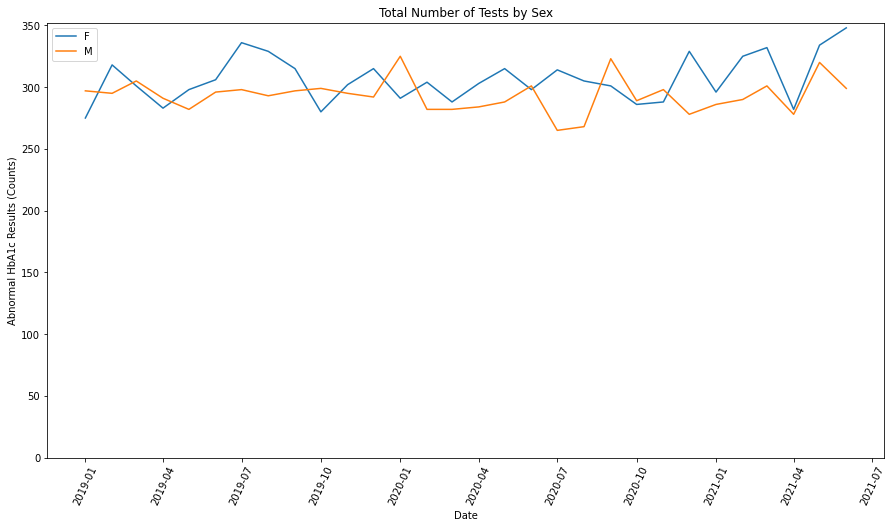

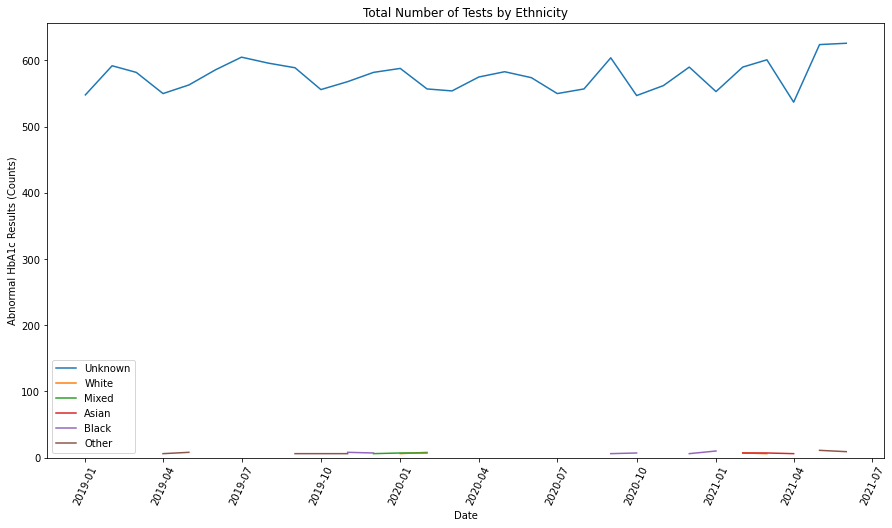

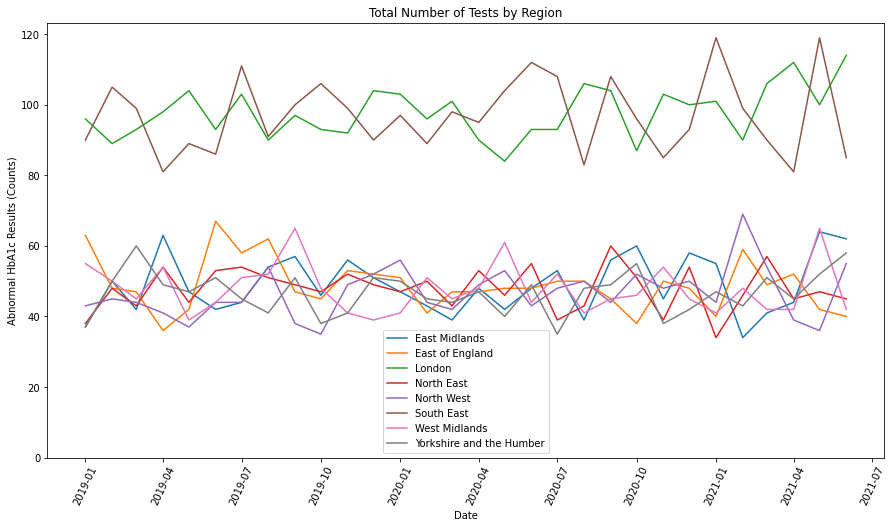

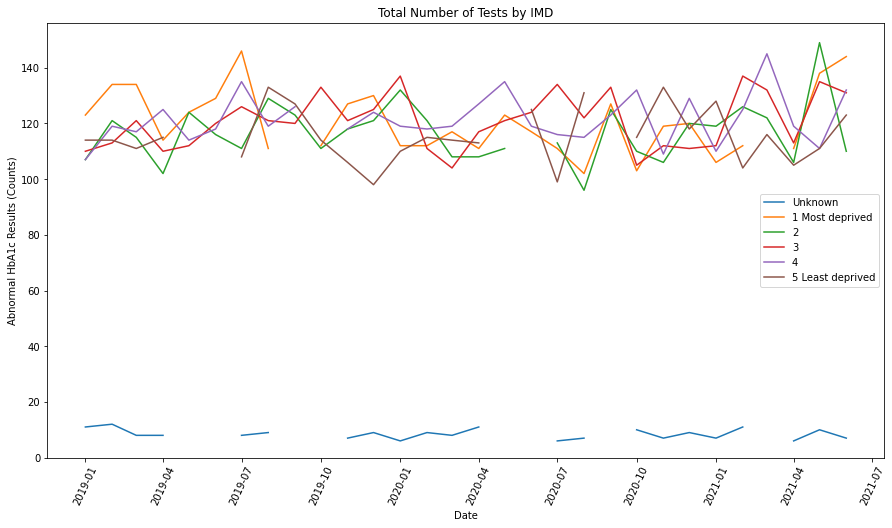

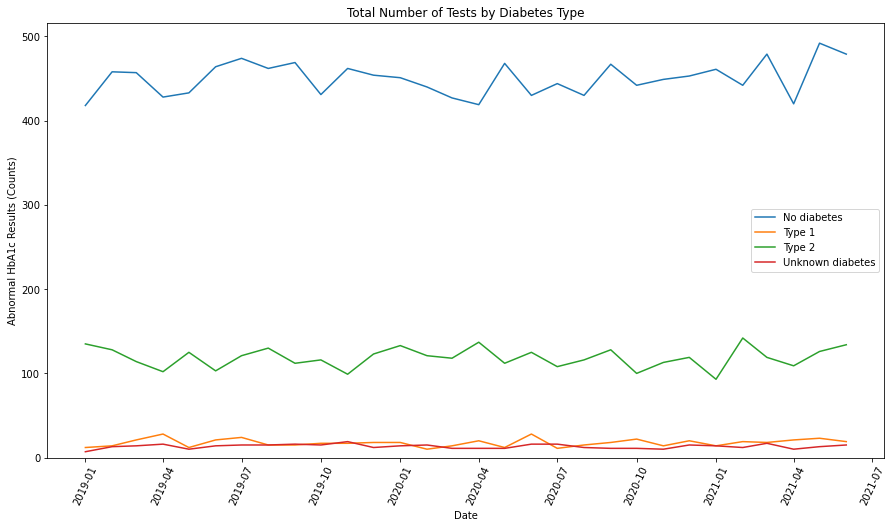

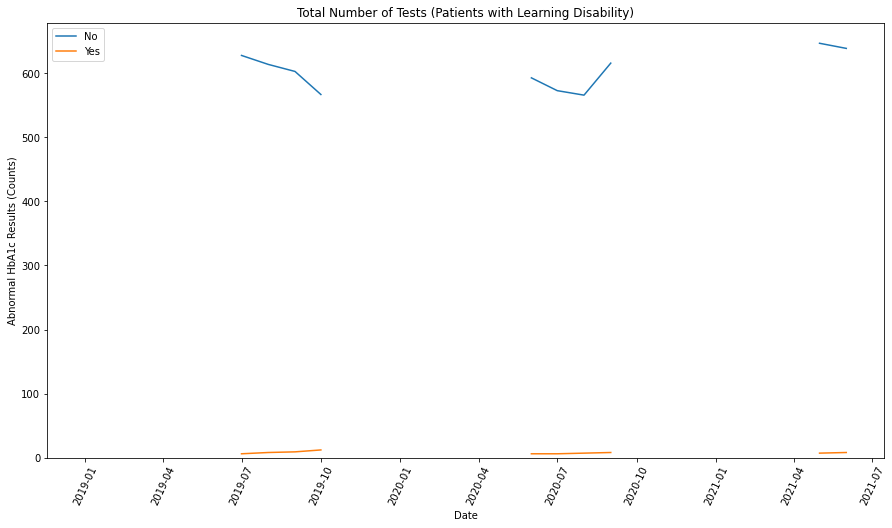

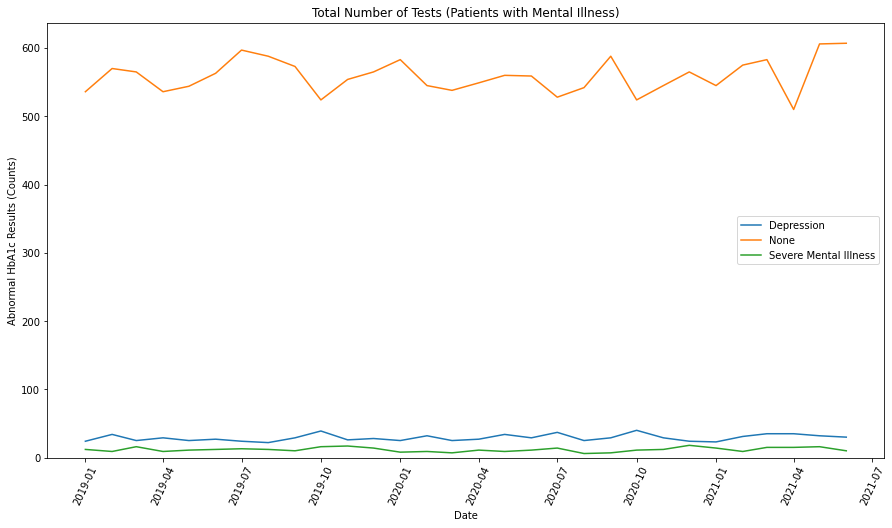

In [12]:
# Population
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Total Number of Tests',
             'population', df_pop, y_min)

# Age
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Total Number of Tests by Age',
             'age_group', df_age.loc[df_age.age_group != 'missing'],
             y_min)

# Sex
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Total Number of Tests by Sex',
             'sex', df_sex.loc[df_sex.sex.isin(['F','M'])], y_min)

# Ethnicity
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Total Number of Tests by Ethnicity',
             'ethnicity', df_eth, y_min)

# Region
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Total Number of Tests by Region',
             'region', df_region, y_min)

# IMD
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Total Number of Tests by IMD',
             'imd', df_imd, y_min)

# Diabetes type
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Total Number of Tests by Diabetes Type',
             'diabetes_type', df_dm, y_min)

# Learning Disability
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Total Number of Tests (Patients with Learning Disability)',
             'learning_disability', df_ld, y_min)

# Mental Illness
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Total Number of Tests (Patients with Mental Illness)',
             'mental_illness', df_mi, y_min)

## Count of All Tests

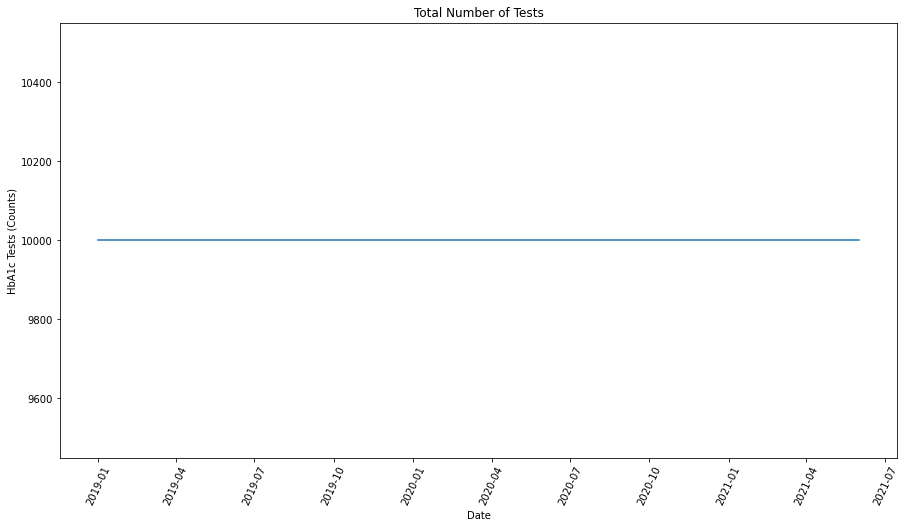

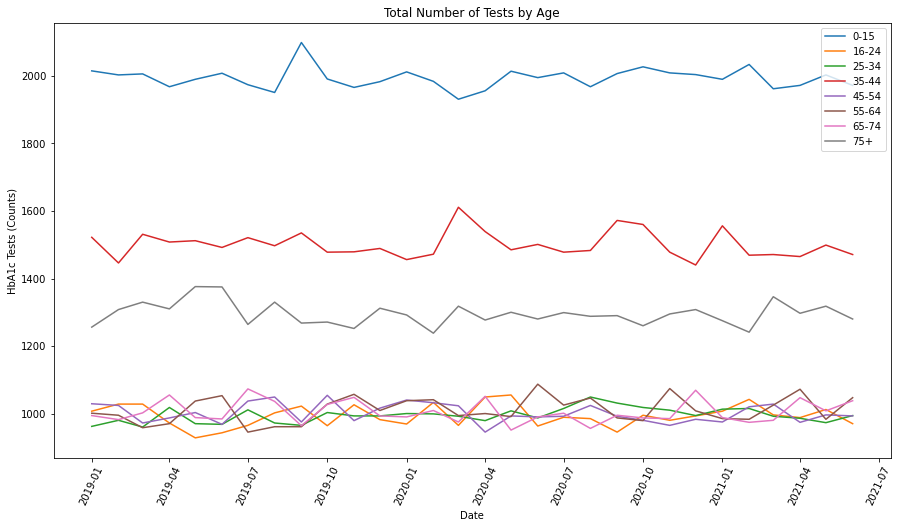

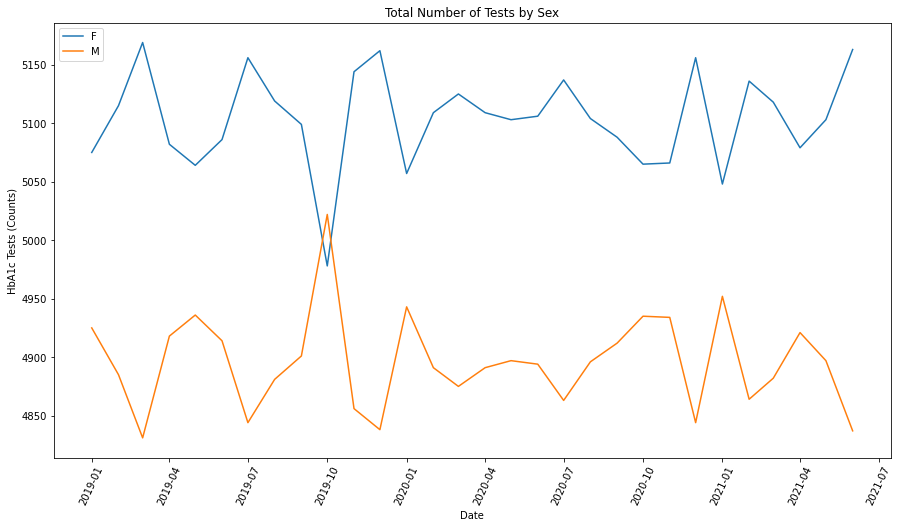

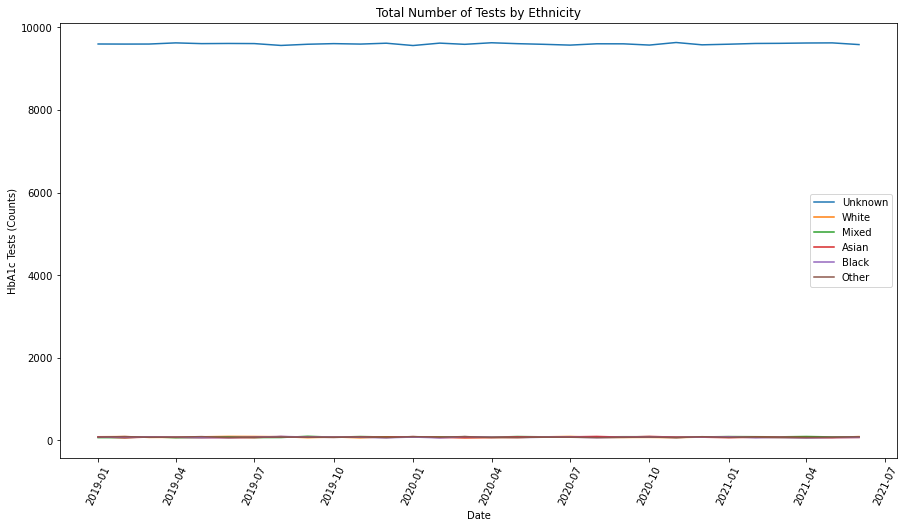

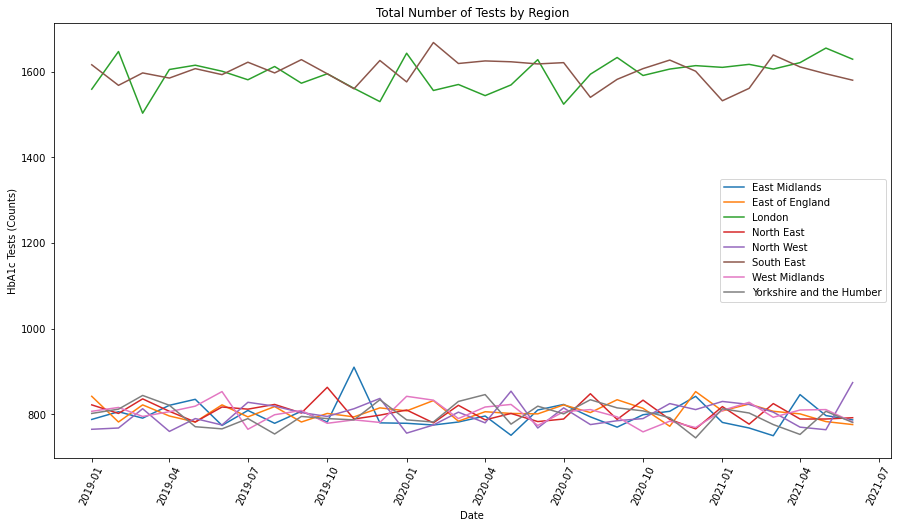

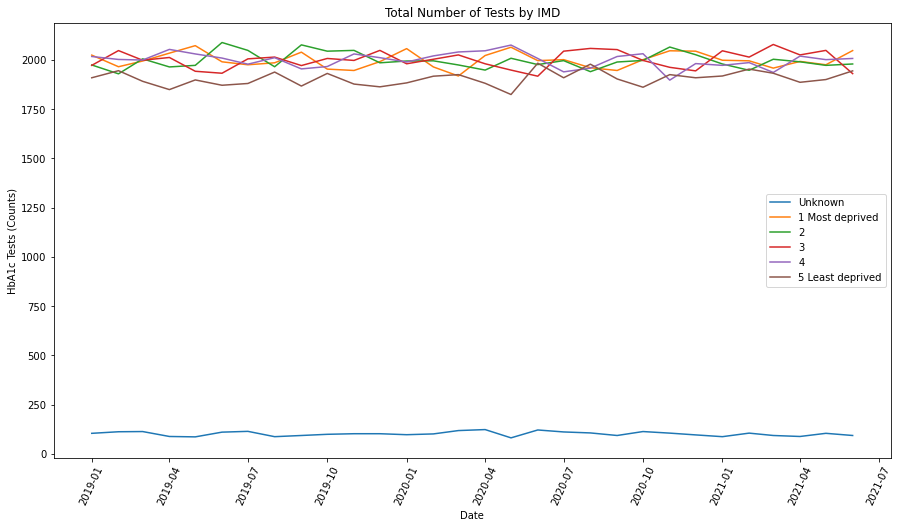

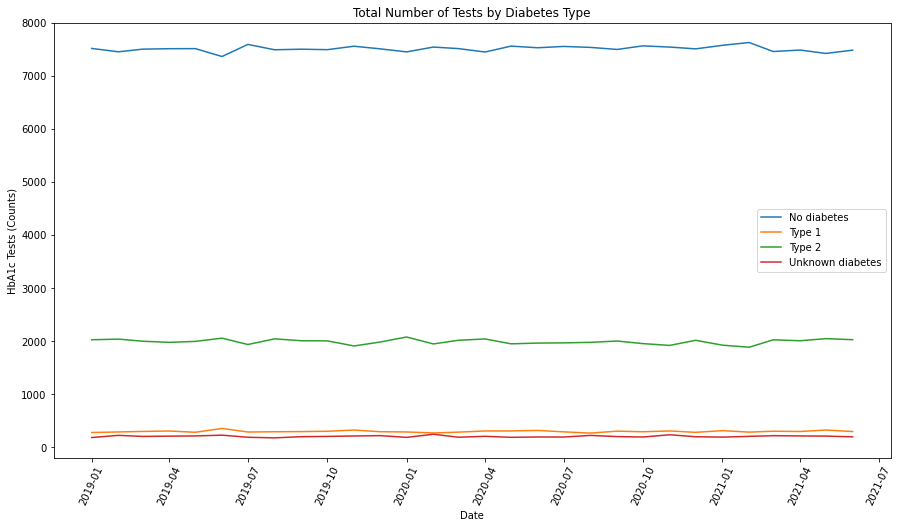

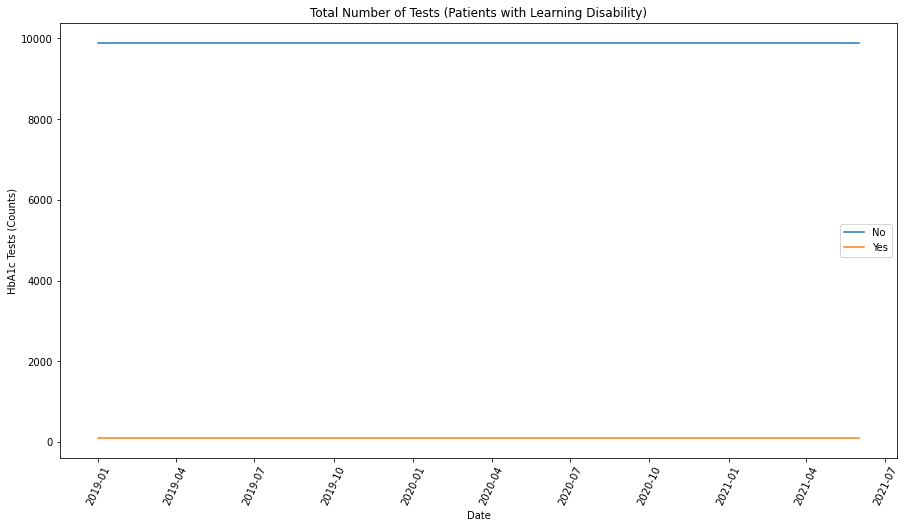

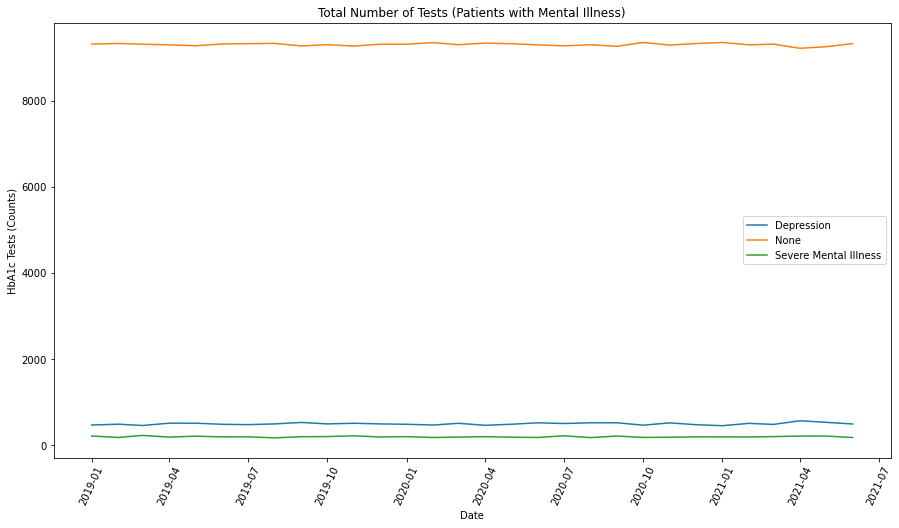

In [13]:
# Population
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests',
             'population', df_pop, y_min)

# Age
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests by Age',
             'age_group', df_age.loc[df_age.age_group != 'missing'],
             y_min)

# Sex
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests by Sex',
             'sex', df_sex.loc[df_sex.sex.isin(['F','M'])], y_min)

# Ethnicity
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests by Ethnicity',
             'ethnicity', df_eth, y_min)

# Region
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests by Region',
             'region', df_region, y_min)

# IMD
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests by IMD',
             'imd', df_imd, y_min)

# Diabetes type
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests by Diabetes Type',
             'diabetes_type', df_dm, y_min)

# Learning Disability
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests (Patients with Learning Disability)',
             'learning_disability', df_ld, y_min)

# Mental Illness
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests (Patients with Mental Illness)',
             'mental_illness', df_mi, y_min)

## Percentage of Abnormal Results of All Tests

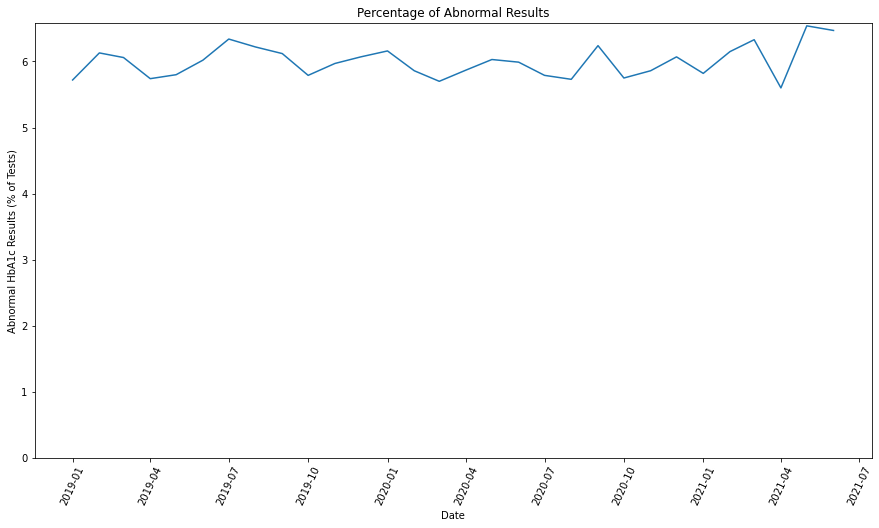

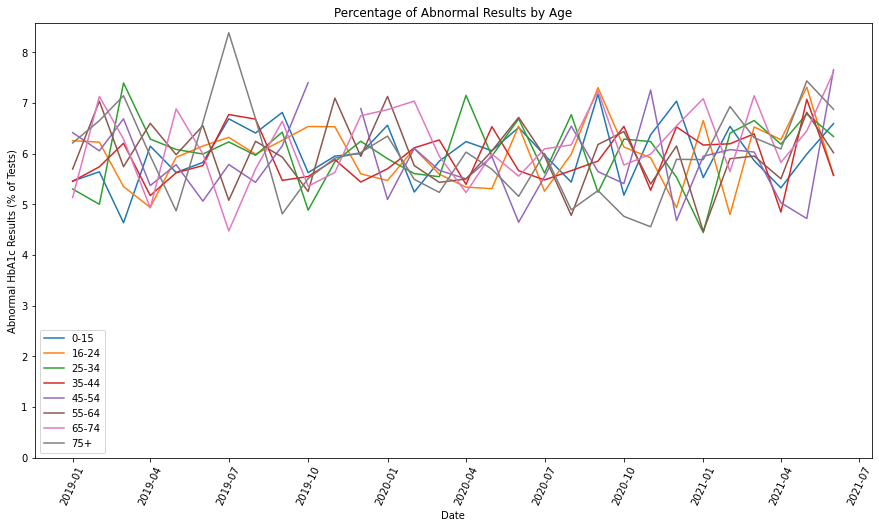

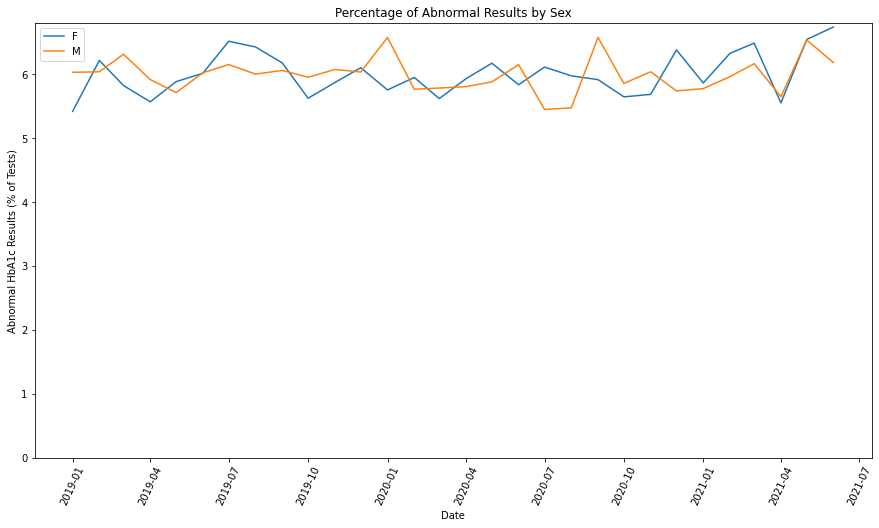

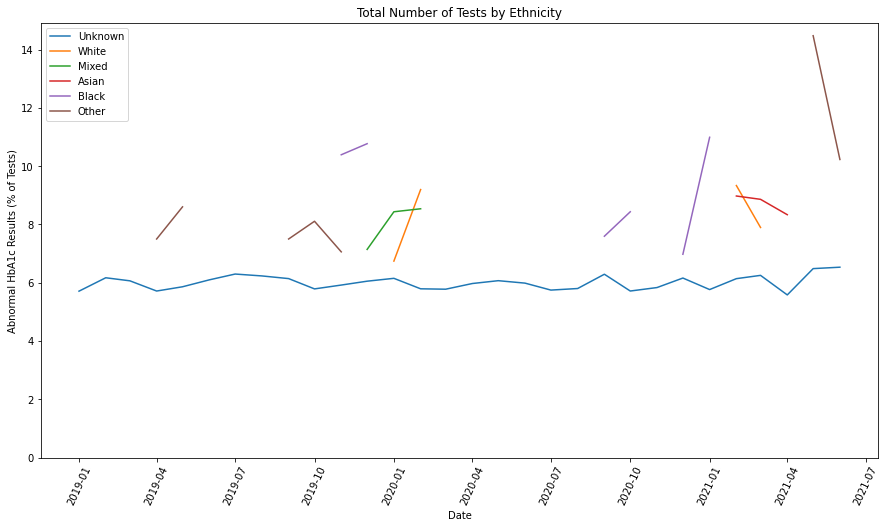

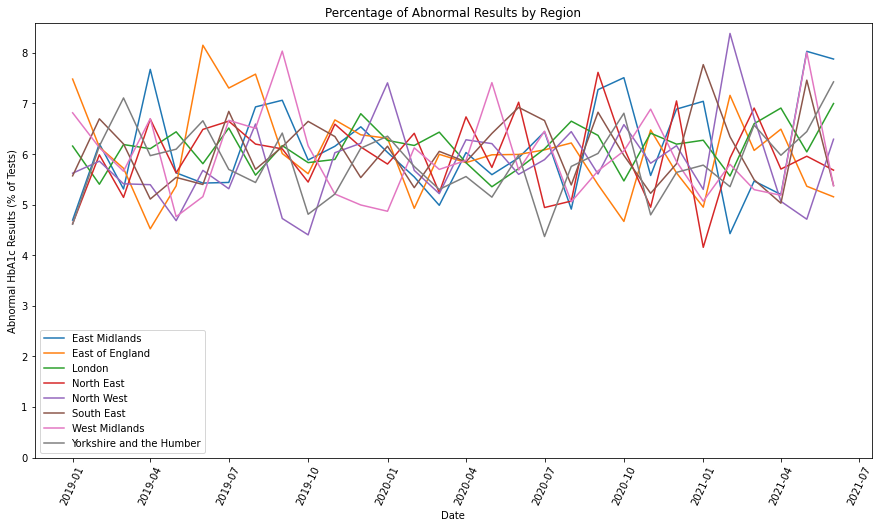

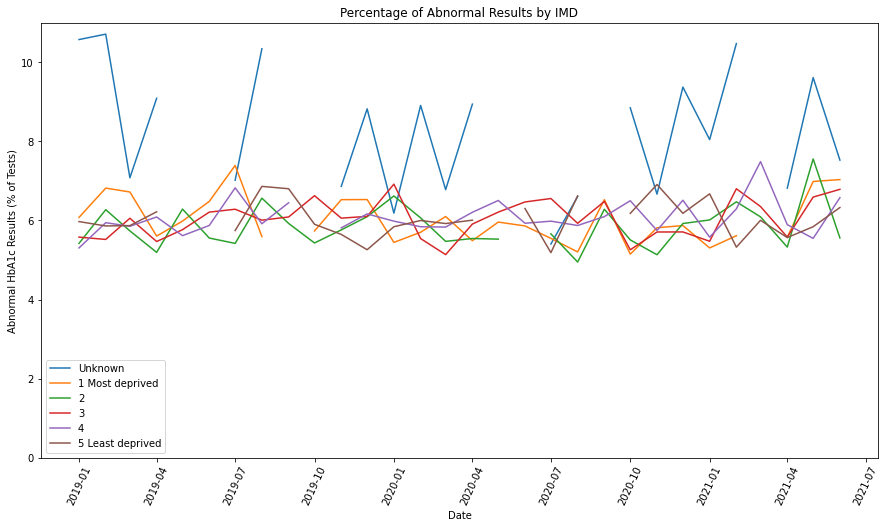

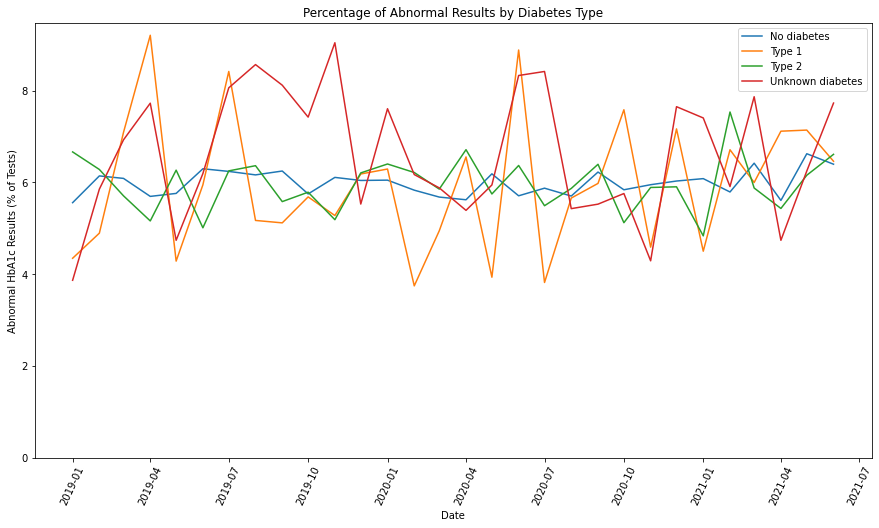

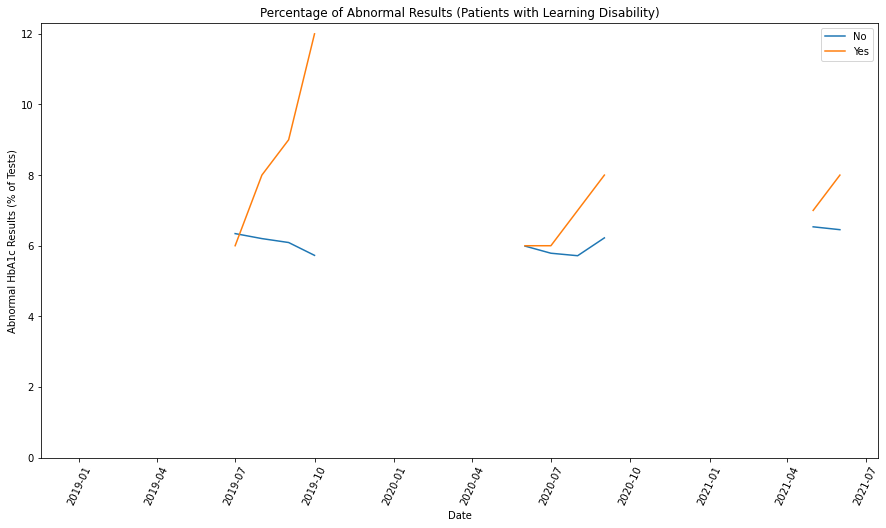

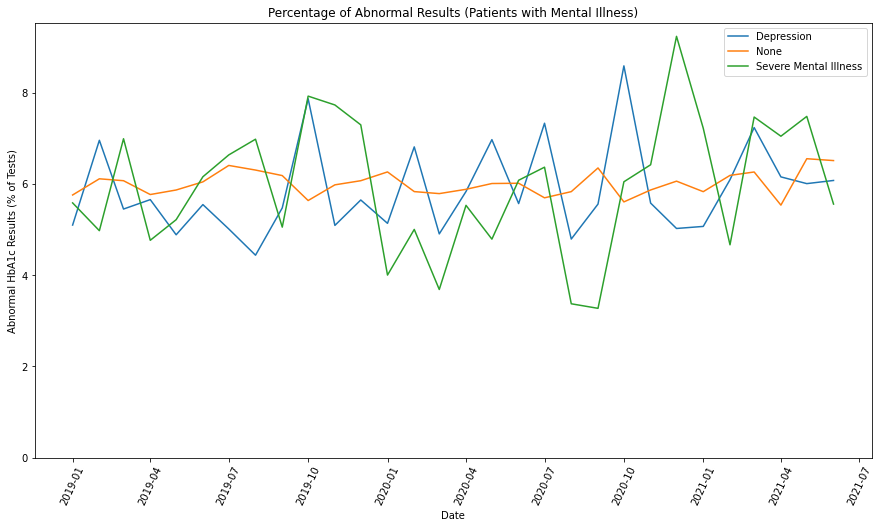

In [14]:
# Population
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results',
             'population', df_pop, y_min)

# Age
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Age',
             'age_group', df_age.loc[df_age.age_group != 'missing'], 
             y_min)

# Sex
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Sex',
             'sex', df_sex.loc[df_sex.sex.isin(['F','M'])], y_min)

# Ethnicity
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Total Number of Tests by Ethnicity',
             'ethnicity', df_eth, y_min)

# Region
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Region',
             'region', df_region, y_min)

# IMD
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by IMD',
             'imd', df_imd, y_min)

# Diabetes type
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results by Diabetes Type',
             'diabetes_type', df_dm, y_min)

# Learning Disability
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (Patients with Learning Disability)',
             'learning_disability', df_ld, y_min)

# Mental Illness
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (Patients with Mental Illness)',
             'mental_illness', df_mi, y_min)

## Tables

In [15]:
measures = ['hba1c_abnormal', 'population', 'pct']

# Population
display(df_pop[['date'] + measures])

# Age
display(df_age[['date', 'age_group'] + measures])

# Sex
display(df_sex[['date', 'sex'] + measures])

# Ethnicity
display(df_eth[['date', 'ethnicity'] + measures])

# Region
display(df_region[['date', 'region'] + measures])

# IMD
display(df_imd[['date', 'imd'] + measures])

# Diabetes Type
display(df_dm[['date', 'diabetes_type'] + measures])

# LD
display(df_ld[['date', 'learning_disability'] + measures])

# Mental Illness
display(df_mi[['date', 'mental_illness'] + measures])

date  hba1c_abnormal  population   pct
0  2019-01-01           572.0       10000  5.72
1  2019-02-01           613.0       10000  6.13
2  2019-03-01           606.0       10000  6.06
3  2019-04-01           574.0       10000  5.74
4  2019-05-01           580.0       10000  5.80
5  2019-06-01           602.0       10000  6.02
6  2019-07-01           634.0       10000  6.34
7  2019-08-01           622.0       10000  6.22
8  2019-09-01           612.0       10000  6.12
9  2019-10-01           579.0       10000  5.79
10 2019-11-01           597.0       10000  5.97
11 2019-12-01           607.0       10000  6.07
12 2020-01-01           616.0       10000  6.16
13 2020-02-01           586.0       10000  5.86
14 2020-03-01           570.0       10000  5.70
15 2020-04-01           587.0       10000  5.87
16 2020-05-01           603.0       10000  6.03
17 2020-06-01           599.0       10000  5.99
18 2020-07-01           579.0       10000  5.79
19 2020-08-01           573.0       10000  5.73
20 2020-09-01           624.0       10000  6.24
21 2020-10-01           575.0       10000  5.75
22 2020-11-01           586.0       10000  5.86
23 2020-12-01           607.0       10000  6.07
24 2021-01-01           582.0       10000  5.82
25 2021-02-01           615.0       10000  6.15
26 2021-03-01           633.0       10000  6.33
27 2021-04-01           560.0       10000  5.60
28 2021-05-01           654.0       10000  6.54
29 2021-06-01           647.0       10000  6.47

date age_group  hba1c_abnormal  population       pct
0   2019-01-01      0-15           110.0        2015  5.459057
1   2019-01-01     16-24            63.0        1007  6.256207
2   2019-01-01     25-34            51.0         962  5.301455
3   2019-01-01     35-44            83.0        1522  5.453351
4   2019-01-01     45-54            66.0        1029  6.413994
5   2019-01-01     55-64            57.0        1001  5.694306
6   2019-01-01     65-74            51.0         994  5.130785
7   2019-01-01       75+            78.0        1256  6.210191
8   2019-01-01   missing            13.0         214  6.074766
9   2019-02-01      0-15           113.0        2003  5.641538
10  2019-02-01     16-24            64.0        1028  6.225681
11  2019-02-01     25-34            49.0         980  5.000000
12  2019-02-01     35-44            83.0        1446  5.739972
13  2019-02-01     45-54            62.0        1024  6.054688
14  2019-02-01     55-64            70.0         995  7.035176
15  2019-02-01     65-74            70.0         982  7.128310
16  2019-02-01       75+            87.0        1308  6.651376
17  2019-02-01   missing            15.0         234  6.410256
18  2019-03-01      0-15            93.0        2006  4.636092
19  2019-03-01     16-24            55.0        1028  5.350195
20  2019-03-01     25-34            71.0         960  7.395833
21  2019-03-01     35-44            95.0        1531  6.205095
22  2019-03-01     45-54            65.0         972  6.687243
23  2019-03-01     55-64            55.0         958  5.741127
24  2019-03-01     65-74            63.0        1002  6.287425
25  2019-03-01       75+            95.0        1330  7.142857
26  2019-03-01   missing            14.0         213  6.572770
27  2019-04-01      0-15           121.0        1968  6.148374
28  2019-04-01     16-24            48.0         972  4.938272
29  2019-04-01     25-34            64.0        1018  6.286837
30  2019-04-01     35-44            78.0        1508  5.172414
31  2019-04-01     45-54            53.0         987  5.369807
32  2019-04-01     55-64            64.0         970  6.597938
33  2019-04-01     65-74            52.0        1055  4.928910
34  2019-04-01       75+            78.0        1310  5.954198
35  2019-04-01   missing            16.0         212  7.547170
36  2019-05-01      0-15           112.0        1990  5.628141
37  2019-05-01     16-24            55.0         928  5.926724
38  2019-05-01     25-34            59.0         970  6.082474
39  2019-05-01     35-44            85.0        1512  5.621693
40  2019-05-01     45-54            58.0        1003  5.782652
41  2019-05-01     55-64            62.0        1037  5.978785
42  2019-05-01     65-74            68.0         988  6.882591
43  2019-05-01       75+            67.0        1376  4.869186
44  2019-05-01   missing            14.0         196  7.142857
45  2019-06-01      0-15           117.0        2008  5.826693
46  2019-06-01     16-24            58.0         943  6.150583
47  2019-06-01     25-34            58.0         968  5.991736
48  2019-06-01     35-44            86.0        1492  5.764075
49  2019-06-01     45-54            49.0         968  5.061983
50  2019-06-01     55-64            69.0        1053  6.552707
51  2019-06-01     65-74            59.0         984  5.995935
52  2019-06-01       75+            91.0        1375  6.618182
53  2019-06-01   missing            15.0         209  7.177033
54  2019-07-01      0-15           132.0        1974  6.686930
55  2019-07-01     16-24            61.0         965  6.321244
56  2019-07-01     25-34            63.0        1011  6.231454
57  2019-07-01     35-44           103.0        1521  6.771861
58  2019-07-01     45-54            60.0        1037  5.785921
59  2019-07-01     55-64            48.0         945  5.079365
60  2019-07-01     65-74            48.0        1073  4.473439
61  2019-07-01       75+           106.0        1264  8.386076
62  2019-07-01   missing            13.0 

date sex  hba1c_abnormal  population       pct
0  2019-01-01   F           275.0        5075  5.418719
1  2019-01-01   M           297.0        4925  6.030457
2  2019-02-01   F           318.0        5115  6.217009
3  2019-02-01   M           295.0        4885  6.038895
4  2019-03-01   F           301.0        5169  5.823177
5  2019-03-01   M           305.0        4831  6.313393
6  2019-04-01   F           283.0        5082  5.568674
7  2019-04-01   M           291.0        4918  5.917039
8  2019-05-01   F           298.0        5064  5.884676
9  2019-05-01   M           282.0        4936  5.713128
10 2019-06-01   F           306.0        5086  6.016516
11 2019-06-01   M           296.0        4914  6.023606
12 2019-07-01   F           336.0        5156  6.516680
13 2019-07-01   M           298.0        4844  6.151941
14 2019-08-01   F           329.0        5119  6.427037
15 2019-08-01   M           293.0        4881  6.002868
16 2019-09-01   F           315.0        5099  6.177682
17 2019-09-01   M           297.0        4901  6.059988
18 2019-10-01   F           280.0        4978  5.624749
19 2019-10-01   M           299.0        5022  5.953803
20 2019-11-01   F           302.0        5144  5.870918
21 2019-11-01   M           295.0        4856  6.074959
22 2019-12-01   F           315.0        5162  6.102286
23 2019-12-01   M           292.0        4838  6.035552
24 2020-01-01   F           291.0        5057  5.754400
25 2020-01-01   M           325.0        4943  6.574954
26 2020-02-01   F           304.0        5109  5.950284
27 2020-02-01   M           282.0        4891  5.765692
28 2020-03-01   F           288.0        5125  5.619512
29 2020-03-01   M           282.0        4875  5.784615
30 2020-04-01   F           303.0        5109  5.930711
31 2020-04-01   M           284.0        4891  5.806584
32 2020-05-01   F           315.0        5103  6.172840
33 2020-05-01   M           288.0        4897  5.881152
34 2020-06-01   F           298.0        5106  5.836271
35 2020-06-01   M           301.0        4894  6.150388
36 2020-07-01   F           314.0        5137  6.112517
37 2020-07-01   M           265.0        4863  5.449311
38 2020-08-01   F           305.0        5104  5.975705
39 2020-08-01   M           268.0        4896  5.473856
40 2020-09-01   F           301.0        5088  5.915881
41 2020-09-01   M           323.0        4912  6.575733
42 2020-10-01   F           286.0        5065  5.646594
43 2020-10-01   M           289.0        4935  5.856130
44 2020-11-01   F           288.0        5066  5.684959
45 2020-11-01   M           298.0        4934  6.039724
46 2020-12-01   F           329.0        5156  6.380915
47 2020-12-01   M           278.0        4844  5.739059
48 2021-01-01   F           296.0        5048  5.863708
49 2021-01-01   M           286.0        4952  5.775444
50 2021-02-01   F           325.0        5136  6.327882
51 2021-02-01   M           290.0        4864  5.962171
52 2021-03-01   F           332.0        5118  6.486909
53 2021-03-01   M           301.0        4882  6.165506
54 2021-04-01   F           282.0        5079  5.552274
55 2021-04-01   M           278.0        4921  5.649258
56 2021-05-01   F           334.0        5103  6.545170
57 2021-05-01   M           320.0        4897  6.534613
58 2021-06-01   F           348.0        5163  6.740267
59 2021-06-01   M           299.0        4837  6.181517

date ethnicity  hba1c_abnormal  population        pct
0   2019-01-01   Unknown           548.0        9597   5.710118
1   2019-01-01     White             6.0          90   6.666667
2   2019-01-01     Mixed             NaN          69        NaN
3   2019-01-01     Asian             7.0          87   8.045977
4   2019-01-01     Black             NaN          77        NaN
5   2019-01-01     Other             NaN          80        NaN
6   2019-02-01   Unknown           592.0        9595   6.169880
7   2019-02-01     White             NaN          94        NaN
8   2019-02-01     Mixed             7.0          68  10.294118
9   2019-02-01     Asian             NaN          65        NaN
10  2019-02-01     Black             NaN          84        NaN
11  2019-02-01     Other             7.0          94   7.446809
12  2019-03-01   Unknown           582.0        9596   6.065027
13  2019-03-01     White             6.0          74   8.108108
14  2019-03-01     Mixed             NaN          88        NaN
15  2019-03-01     Asian             NaN          82        NaN
16  2019-03-01     Black             NaN          83        NaN
17  2019-03-01     Other             NaN          77        NaN
18  2019-04-01   Unknown           550.0        9624   5.714879
19  2019-04-01     White             NaN          75        NaN
20  2019-04-01     Mixed             NaN          67        NaN
21  2019-04-01     Asian             NaN          76        NaN
22  2019-04-01     Black             7.0          78   8.974359
23  2019-04-01     Other             6.0          80   7.500000
24  2019-05-01   Unknown           563.0        9606   5.860920
25  2019-05-01     White             NaN          89        NaN
26  2019-05-01     Mixed             NaN          73        NaN
27  2019-05-01     Asian             NaN          70        NaN
28  2019-05-01     Black             NaN          69        NaN
29  2019-05-01     Other             8.0          93   8.602151
30  2019-06-01   Unknown           586.0        9610   6.097815
31  2019-06-01     White             6.0          98   6.122449
32  2019-06-01     Mixed             NaN          85        NaN
33  2019-06-01     Asian             NaN          69        NaN
34  2019-06-01     Black             NaN          69        NaN
35  2019-06-01     Other             NaN          69        NaN
36  2019-07-01   Unknown           605.0        9607   6.297491
37  2019-07-01     White             NaN          96        NaN
38  2019-07-01     Mixed             7.0          70  10.000000
39  2019-07-01     Asian             7.0          69  10.144928
40  2019-07-01     Black             NaN          80        NaN
41  2019-07-01     Other             NaN          78        NaN
42  2019-08-01   Unknown           596.0        9562   6.233006
43  2019-08-01     White             8.0          91   8.791209
44  2019-08-01     Mixed             NaN          71        NaN
45  2019-08-01     Asian             NaN          94        NaN
46  2019-08-01     Black             6.0          97   6.185567
47  2019-08-01     Other             NaN          85        NaN
48  2019-09-01   Unknown           589.0        9591   6.141174
49  2019-09-01     White             NaN          67        NaN
50  2019-09-01     Mixed             NaN         101        NaN
51  2019-09-01     Asian             7.0          78   8.974359
52  2019-09-01     Black             NaN          83        NaN
53  2019-09-01     Other             6.0          80   7.500000
54  2019-10-01   Unknown           556.0        9606   5.788049
55  2019-10-01     White             NaN          84        NaN
56  2019-10-01     Mixed             NaN          80        NaN
57  2019-10-01     Asian             NaN          76        NaN
58  2019-10-01     Black             NaN          80        NaN
59  2019-10-01     Other             6.0          74   8.108108
60  2019-11-01   Unknown           568.0        9595   5.919750
61  2019-11-01     White             NaN  

date                    region  hba1c_abnormal  population       pct
0   2019-01-01                       NaN           113.0        1999  5.652826
1   2019-01-01             East Midlands            37.0         788  4.695431
2   2019-01-01           East of England            63.0         842  7.482185
3   2019-01-01                    London            96.0        1559  6.157793
4   2019-01-01                North East            38.0         822  4.622871
5   2019-01-01                North West            43.0         765  5.620915
6   2019-01-01                South East            90.0        1616  5.569307
7   2019-01-01             West Midlands            55.0         807  6.815366
8   2019-01-01  Yorkshire and the Humber            37.0         802  4.613466
9   2019-02-01                       NaN           128.0        1999  6.403202
10  2019-02-01             East Midlands            50.0         806  6.203474
11  2019-02-01           East of England            48.0         782  6.138107
12  2019-02-01                    London            89.0        1647  5.403764
13  2019-02-01                North East            48.0         802  5.985037
14  2019-02-01                North West            45.0         768  5.859375
15  2019-02-01                South East           105.0        1568  6.696429
16  2019-02-01             West Midlands            50.0         816  6.127451
17  2019-02-01  Yorkshire and the Humber            50.0         812  6.157635
18  2019-03-01                       NaN           133.0        1999  6.653327
19  2019-03-01             East Midlands            42.0         791  5.309735
20  2019-03-01           East of England            47.0         822  5.717762
21  2019-03-01                    London            93.0        1503  6.187625
22  2019-03-01                North East            43.0         836  5.143541
23  2019-03-01                North West            44.0         813  5.412054
24  2019-03-01                South East            99.0        1597  6.199123
25  2019-03-01             West Midlands            45.0         795  5.660377
26  2019-03-01  Yorkshire and the Humber            60.0         844  7.109005
27  2019-04-01                       NaN            98.0        1999  4.902451
28  2019-04-01             East Midlands            63.0         821  7.673569
29  2019-04-01           East of England            36.0         796  4.522613
30  2019-04-01                    London            98.0        1605  6.105919
31  2019-04-01                North East            54.0         807  6.691450
32  2019-04-01                North West            41.0         760  5.394737
33  2019-04-01                South East            81.0        1585  5.110410
34  2019-04-01             West Midlands            54.0         806  6.699752
35  2019-04-01  Yorkshire and the Humber            49.0         821  5.968331
36  2019-05-01                       NaN           131.0        1999  6.553277
37  2019-05-01             East Midlands            47.0         835  5.628743
38  2019-05-01           East of England            42.0         782  5.370844
39  2019-05-01                    London           104.0        1615  6.439628
40  2019-05-01                North East            44.0         782  5.626598
41  2019-05-01                North West            37.0         790  4.683544
42  2019-05-01                South East            89.0        1607  5.538270
43  2019-05-01             West Midlands            39.0         819  4.761905
44  2019-05-01  Yorkshire and the Humber            47.0         771  6.095979
45  2019-06-01                       NaN           122.0        1999  6.103052
46  2019-06-01             East Midlands            42.0         774  5.426357
47  2019-06-01           East of England            67.0         822  8.150852
48  2019-06-01                    London            93.0        1601  5.808869
49  2019-06-01                North East            53.0    

date               imd  hba1c_abnormal  population        pct
0   2019-01-01           Unknown            11.0         104  10.576923
1   2019-01-01   1 Most deprived           123.0        2024   6.077075
2   2019-01-01                 2           107.0        1974   5.420466
3   2019-01-01                 3           110.0        1972   5.578093
4   2019-01-01                 4           107.0        2017   5.304908
5   2019-01-01  5 Least deprived           114.0        1909   5.971713
6   2019-02-01           Unknown            12.0         112  10.714286
7   2019-02-01   1 Most deprived           134.0        1965   6.819338
8   2019-02-01                 2           121.0        1929   6.272680
9   2019-02-01                 3           113.0        2047   5.520274
10  2019-02-01                 4           119.0        2002   5.944056
11  2019-02-01  5 Least deprived           114.0        1945   5.861183
12  2019-03-01           Unknown             8.0         113   7.079646
13  2019-03-01   1 Most deprived           134.0        1994   6.720160
14  2019-03-01                 2           115.0        2005   5.735661
15  2019-03-01                 3           121.0        1998   6.056056
16  2019-03-01                 4           117.0        1999   5.852926
17  2019-03-01  5 Least deprived           111.0        1891   5.869910
18  2019-04-01           Unknown             8.0          88   9.090909
19  2019-04-01   1 Most deprived           114.0        2034   5.604720
20  2019-04-01                 2           102.0        1964   5.193483
21  2019-04-01                 3           110.0        2012   5.467197
22  2019-04-01                 4           125.0        2053   6.088651
23  2019-04-01  5 Least deprived           115.0        1849   6.219578
24  2019-05-01           Unknown             NaN          86        NaN
25  2019-05-01   1 Most deprived           124.0        2072   5.984556
26  2019-05-01                 2           124.0        1972   6.288032
27  2019-05-01                 3           112.0        1942   5.767250
28  2019-05-01                 4           114.0        2030   5.615764
29  2019-05-01  5 Least deprived             NaN        1898        NaN
30  2019-06-01           Unknown             NaN         110        NaN
31  2019-06-01   1 Most deprived           129.0        1990   6.482412
32  2019-06-01                 2           116.0        2088   5.555556
33  2019-06-01                 3           120.0        1932   6.211180
34  2019-06-01                 4           118.0        2009   5.873569
35  2019-06-01  5 Least deprived             NaN        1871        NaN
36  2019-07-01           Unknown             8.0         114   7.017544
37  2019-07-01   1 Most deprived           146.0        1975   7.392405
38  2019-07-01                 2           111.0        2048   5.419922
39  2019-07-01                 3           126.0        2005   6.284289
40  2019-07-01                 4           135.0        1978   6.825076
41  2019-07-01  5 Least deprived           108.0        1880   5.744681
42  2019-08-01           Unknown             9.0          87  10.344828
43  2019-08-01   1 Most deprived           111.0        1985   5.591940
44  2019-08-01                 2           129.0        1965   6.564885
45  2019-08-01                 3           121.0        2014   6.007944
46  2019-08-01                 4           119.0        2011   5.917454
47  2019-08-01  5 Least deprived           133.0        1938   6.862745
48  2019-09-01           Unknown             NaN          93        NaN
49  2019-09-01   1 Most deprived             NaN        2039        NaN
50  2019-09-01                 2           123.0        2076   5.924855
51  2019-09-01                 3           120.0        1971   6.088280
52  2019-09-01                 4           126.0        1954   6.448311
53  2019-09-01  5 Least deprived           127.0        1867   6.802357
54  2019-10-01           Unknown             NaN  

date     diabetes_type  hba1c_abnormal  population       pct
0   2019-01-01       No diabetes           418.0        7518  5.559989
1   2019-01-01            Type 1            12.0         276  4.347826
2   2019-01-01            Type 2           135.0        2025  6.666667
3   2019-01-01  Unknown diabetes             7.0         181  3.867403
4   2019-02-01       No diabetes           458.0        7455  6.143528
5   2019-02-01            Type 1            14.0         286  4.895105
6   2019-02-01            Type 2           128.0        2037  6.283751
7   2019-02-01  Unknown diabetes            13.0         222  5.855856
8   2019-03-01       No diabetes           457.0        7505  6.089274
9   2019-03-01            Type 1            21.0         296  7.094595
10  2019-03-01            Type 2           114.0        1997  5.708563
11  2019-03-01  Unknown diabetes            14.0         202  6.930693
12  2019-04-01       No diabetes           428.0        7513  5.696792
13  2019-04-01            Type 1            28.0         304  9.210526
14  2019-04-01            Type 2           102.0        1976  5.161943
15  2019-04-01  Unknown diabetes            16.0         207  7.729469
16  2019-05-01       No diabetes           433.0        7515  5.761810
17  2019-05-01            Type 1            12.0         280  4.285714
18  2019-05-01            Type 2           125.0        1994  6.268806
19  2019-05-01  Unknown diabetes            10.0         211  4.739336
20  2019-06-01       No diabetes           464.0        7366  6.299213
21  2019-06-01            Type 1            21.0         353  5.949008
22  2019-06-01            Type 2           103.0        2055  5.012165
23  2019-06-01  Unknown diabetes            14.0         226  6.194690
24  2019-07-01       No diabetes           474.0        7594  6.241770
25  2019-07-01            Type 1            24.0         285  8.421053
26  2019-07-01            Type 2           121.0        1935  6.253230
27  2019-07-01  Unknown diabetes            15.0         186  8.064516
28  2019-08-01       No diabetes           462.0        7493  6.165755
29  2019-08-01            Type 1            15.0         290  5.172414
30  2019-08-01            Type 2           130.0        2042  6.366308
31  2019-08-01  Unknown diabetes            15.0         175  8.571429
32  2019-09-01       No diabetes           469.0        7504  6.250000
33  2019-09-01            Type 1            15.0         293  5.119454
34  2019-09-01            Type 2           112.0        2006  5.583250
35  2019-09-01  Unknown diabetes            16.0         197  8.121827
36  2019-10-01       No diabetes           431.0        7495  5.750500
37  2019-10-01            Type 1            17.0         299  5.685619
38  2019-10-01            Type 2           116.0        2004  5.788423
39  2019-10-01  Unknown diabetes            15.0         202  7.425743
40  2019-11-01       No diabetes           462.0        7560  6.111111
41  2019-11-01            Type 1            17.0         322  5.279503
42  2019-11-01            Type 2            99.0        1908  5.188679
43  2019-11-01  Unknown diabetes            19.0         210  9.047619
44  2019-12-01       No diabetes           454.0        7511  6.044468
45  2019-12-01            Type 1            18.0         291  6.185567
46  2019-12-01            Type 2           123.0        1981  6.208985
47  2019-12-01  Unknown diabetes            12.0         217  5.529954
48  2020-01-01       No diabetes           451.0        7453  6.051255
49  2020-01-01            Type 1            18.0         286  6.293706
50  2020-01-01            Type 2           133.0        2077  6.403467
51  2020-01-01  Unknown diabetes            14.0         184  7.608696
52  2020-02-01       No diabetes           440.0        7544  5.832450
53  2020-02-01            Type 1            10.0         267  3.745318
54  2020-02-01            Type 2           121.0        1946  6.217883
55  2020-02-01  Unknown diabetes  

date learning_disability  hba1c_abnormal  population        pct
0  2019-01-01                  No           566.0        9900   5.717172
1  2019-01-01                 Yes             6.0         100   6.000000
2  2019-02-01                  No             NaN        9900        NaN
3  2019-02-01                 Yes             NaN         100        NaN
4  2019-03-01                  No           599.0        9900   6.050505
5  2019-03-01                 Yes             7.0         100   7.000000
6  2019-04-01                  No             NaN        9900        NaN
7  2019-04-01                 Yes             NaN         100        NaN
8  2019-05-01                  No           574.0        9900   5.797980
9  2019-05-01                 Yes             6.0         100   6.000000
10 2019-06-01                  No             NaN        9900        NaN
11 2019-06-01                 Yes             NaN         100        NaN
12 2019-07-01                  No           628.0        9900   6.343434
13 2019-07-01                 Yes             6.0         100   6.000000
14 2019-08-01                  No           614.0        9900   6.202020
15 2019-08-01                 Yes             8.0         100   8.000000
16 2019-09-01                  No           603.0        9900   6.090909
17 2019-09-01                 Yes             9.0         100   9.000000
18 2019-10-01                  No           567.0        9900   5.727273
19 2019-10-01                 Yes            12.0         100  12.000000
20 2019-11-01                  No             NaN        9900        NaN
21 2019-11-01                 Yes             NaN         100        NaN
22 2019-12-01                  No             NaN        9900        NaN
23 2019-12-01                 Yes             NaN         100        NaN
24 2020-01-01                  No           609.0        9900   6.151515
25 2020-01-01                 Yes             7.0         100   7.000000
26 2020-02-01                  No             NaN        9900        NaN
27 2020-02-01                 Yes             NaN         100        NaN
28 2020-03-01                  No             NaN        9900        NaN
29 2020-03-01                 Yes             NaN         100        NaN
30 2020-04-01                  No             NaN        9900        NaN
31 2020-04-01                 Yes             NaN         100        NaN
32 2020-05-01                  No             NaN        9900        NaN
33 2020-05-01                 Yes             NaN         100        NaN
34 2020-06-01                  No           593.0        9900   5.989899
35 2020-06-01                 Yes             6.0         100   6.000000
36 2020-07-01                  No           573.0        9900   5.787879
37 2020-07-01                 Yes             6.0         100   6.000000
38 2020-08-01                  No           566.0        9900   5.717172
39 2020-08-01                 Yes             7.0         100   7.000000
40 2020-09-01                  No           616.0        9900   6.222222
41 2020-09-01                 Yes             8.0         100   8.000000
42 2020-10-01                  No             NaN        9900        NaN
43 2020-10-01                 Yes             NaN         100        NaN
44 2020-11-01                  No             NaN        9900        NaN
45 2020-11-01                 Yes             NaN         100        NaN
46 2020-12-01                  No             NaN        9900        NaN
47 2020-12-01                 Yes             NaN         100        NaN
48 2021-01-01                  No             NaN        9900        NaN
49 2021-01-01                 Yes             NaN         100        NaN
50 2021-02-01                  No             NaN        9900        NaN
51 2021-02-01                 Yes             NaN         100        NaN
52 2021-03-01                  No             NaN        9900        NaN
53 2021-03-01                 Yes             NaN         100      

date         mental_illness  hba1c_abnormal  population       pct
0  2019-01-01             Depression            24.0         471  5.095541
1  2019-01-01                   None           536.0        9314  5.754778
2  2019-01-01  Severe Mental Illness            12.0         215  5.581395
3  2019-02-01             Depression            34.0         489  6.952965
4  2019-02-01                   None           570.0        9330  6.109325
5  2019-02-01  Severe Mental Illness             9.0         181  4.972376
6  2019-03-01             Depression            25.0         459  5.446623
7  2019-03-01                   None           565.0        9312  6.067440
8  2019-03-01  Severe Mental Illness            16.0         229  6.986900
9  2019-04-01             Depression            29.0         513  5.653021
10 2019-04-01                   None           536.0        9298  5.764681
11 2019-04-01  Severe Mental Illness             9.0         189  4.761905
12 2019-05-01             Depression            25.0         512  4.882812
13 2019-05-01                   None           544.0        9277  5.863965
14 2019-05-01  Severe Mental Illness            11.0         211  5.213270
15 2019-06-01             Depression            27.0         487  5.544148
16 2019-06-01                   None           563.0        9318  6.042069
17 2019-06-01  Severe Mental Illness            12.0         195  6.153846
18 2019-07-01             Depression            24.0         479  5.010438
19 2019-07-01                   None           597.0        9325  6.402145
20 2019-07-01  Severe Mental Illness            13.0         196  6.632653
21 2019-08-01             Depression            22.0         496  4.435484
22 2019-08-01                   None           588.0        9332  6.300900
23 2019-08-01  Severe Mental Illness            12.0         172  6.976744
24 2019-09-01             Depression            29.0         530  5.471698
25 2019-09-01                   None           573.0        9272  6.179896
26 2019-09-01  Severe Mental Illness            10.0         198  5.050505
27 2019-10-01             Depression            39.0         496  7.862903
28 2019-10-01                   None           524.0        9302  5.633197
29 2019-10-01  Severe Mental Illness            16.0         202  7.920792
30 2019-11-01             Depression            26.0         511  5.088063
31 2019-11-01                   None           554.0        9269  5.976912
32 2019-11-01  Severe Mental Illness            17.0         220  7.727273
33 2019-12-01             Depression            28.0         496  5.645161
34 2019-12-01                   None           565.0        9312  6.067440
35 2019-12-01  Severe Mental Illness            14.0         192  7.291667
36 2020-01-01             Depression            25.0         487  5.133470
37 2020-01-01                   None           583.0        9313  6.260067
38 2020-01-01  Severe Mental Illness             8.0         200  4.000000
39 2020-02-01             Depression            32.0         470  6.808511
40 2020-02-01                   None           545.0        9350  5.828877
41 2020-02-01  Severe Mental Illness             9.0         180  5.000000
42 2020-03-01             Depression            25.0         510  4.901961
43 2020-03-01                   None           538.0        9300  5.784946
44 2020-03-01  Severe Mental Illness             7.0         190  3.684211
45 2020-04-01             Depression            27.0         463  5.831533
46 2020-04-01                   None           549.0        9338  5.879203
47 2020-04-01  Severe Mental Illness            11.0         199  5.527638
48 2020-05-01             Depression            34.0         488  6.967213
49 2020-05-01                   None           560.0        9324  6.006006
50 2020-05-01  Severe Mental Illness             9.0         188  4.787234
51 2020-06-01             Depression            29.0         521  5.566219
52 2020-06-01                   No

________

## Count of Abnormal Results (Patients with Type 1 Diabetes Only)

In [16]:
y_min_t1 = 0

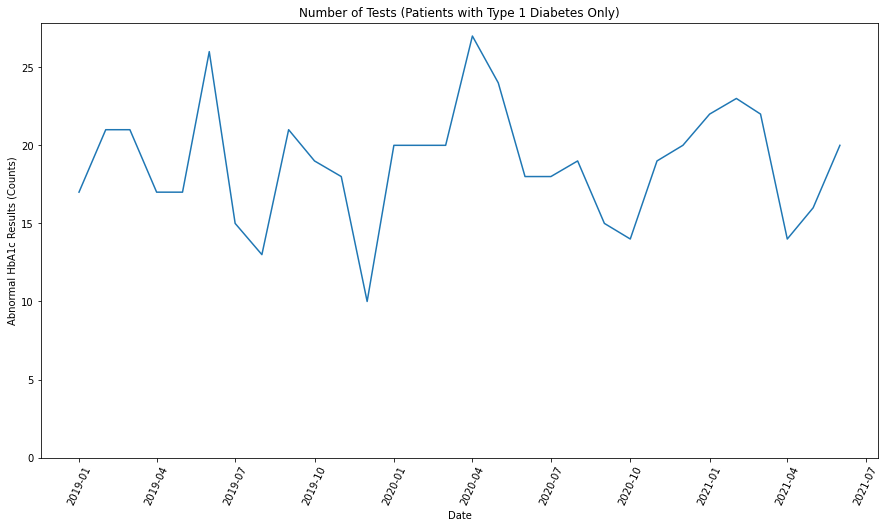

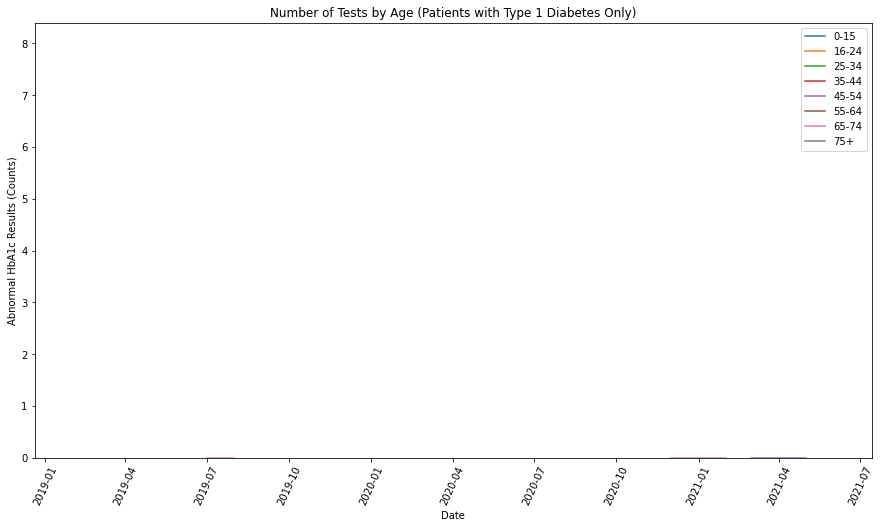

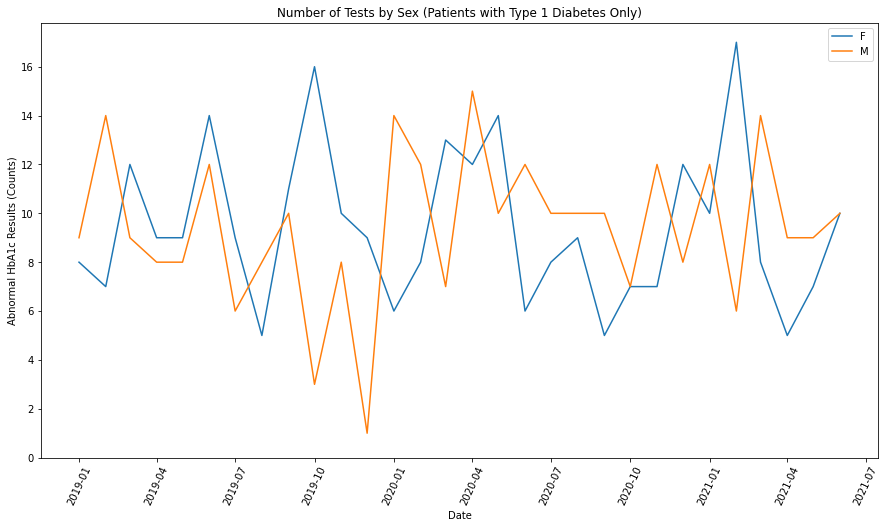

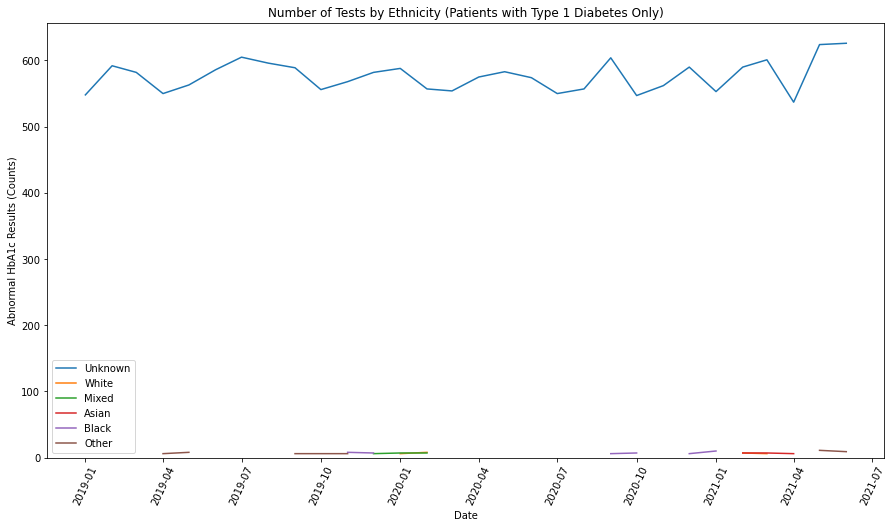

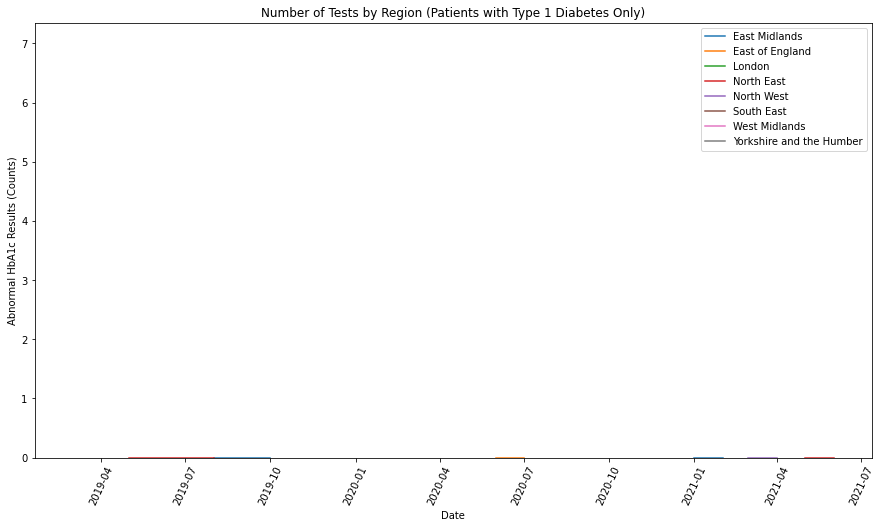

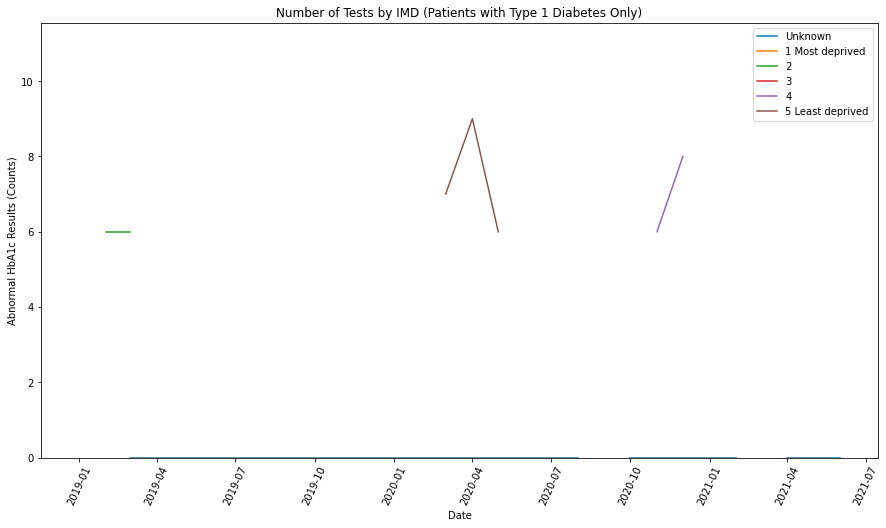

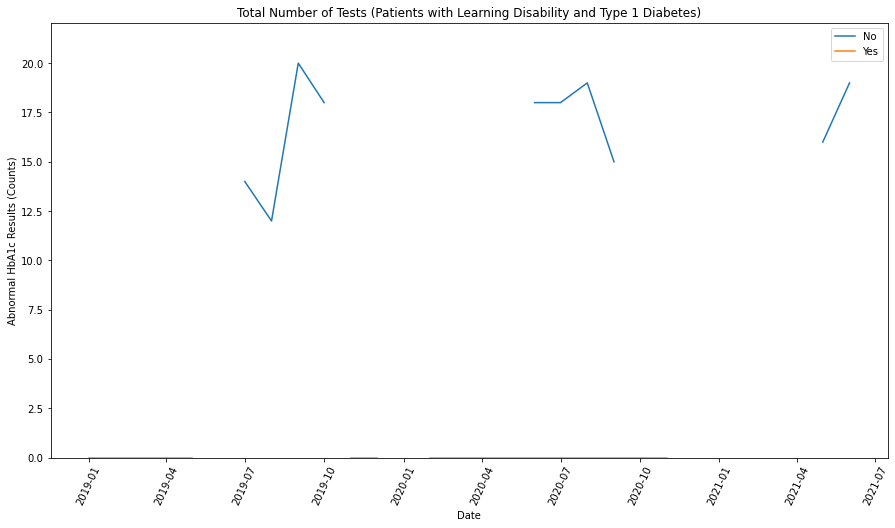

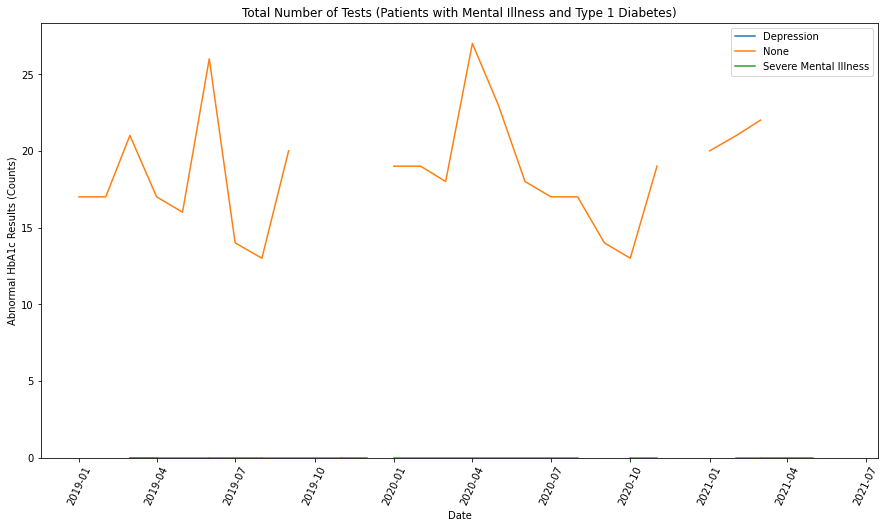

In [17]:
# Population
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Number of Tests (Patients with Type 1 Diabetes Only)',
             'population', df_pop_t1, y_min_t1)

# Age
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Age (Patients with Type 1 Diabetes Only)',
             'age_group', df_age_t1.loc[df_age_t1.age_group != 'missing'], 
             y_min_t1)

# Sex
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Sex (Patients with Type 1 Diabetes Only)',
             'sex', df_sex_t1.loc[df_sex_t1.sex.isin(['F','M'])], 
             y_min_t1)

# Ethnicity
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Ethnicity (Patients with Type 1 Diabetes Only)',
             'ethnicity', df_eth, y_min_t1)

# Region
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Region (Patients with Type 1 Diabetes Only)',
             'region', df_region_t1, y_min_t1)

# IMD
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by IMD (Patients with Type 1 Diabetes Only)',
             'imd', df_imd_t1, y_min_t1)

# Learning Disability
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Total Number of Tests (Patients with Learning Disability and Type 1 Diabetes)',
             'learning_disability', df_ld_t1, y_min_t1)

# Mental Illness
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Total Number of Tests (Patients with Mental Illness and Type 1 Diabetes)',
             'mental_illness', df_mi_t1, y_min_t1)

## Count of All Tests (Patients with Type 1 Diabetes Only)

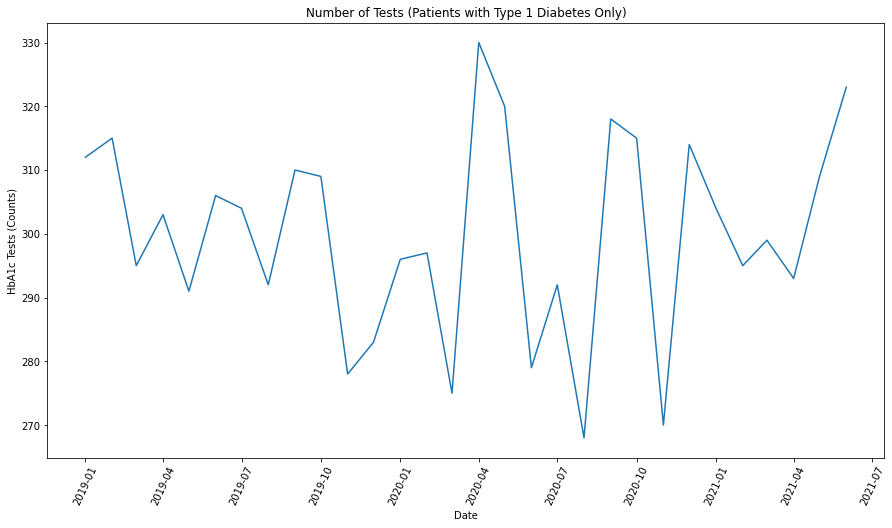

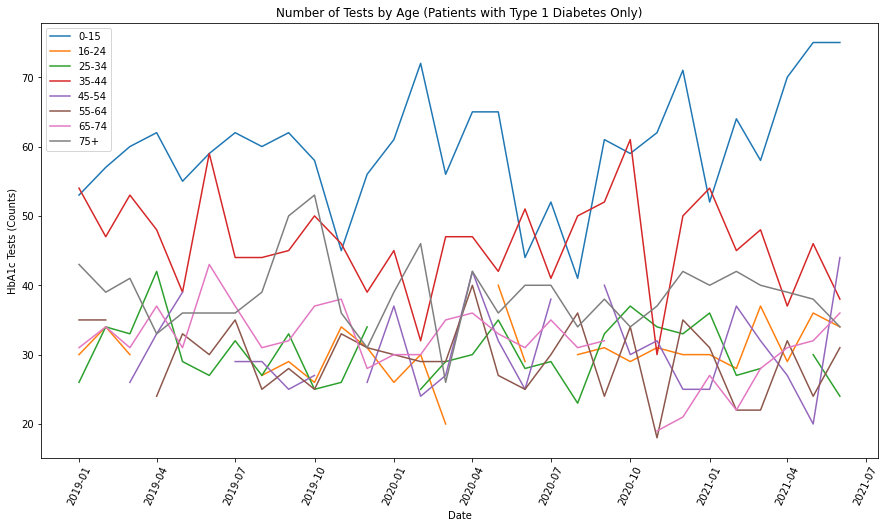

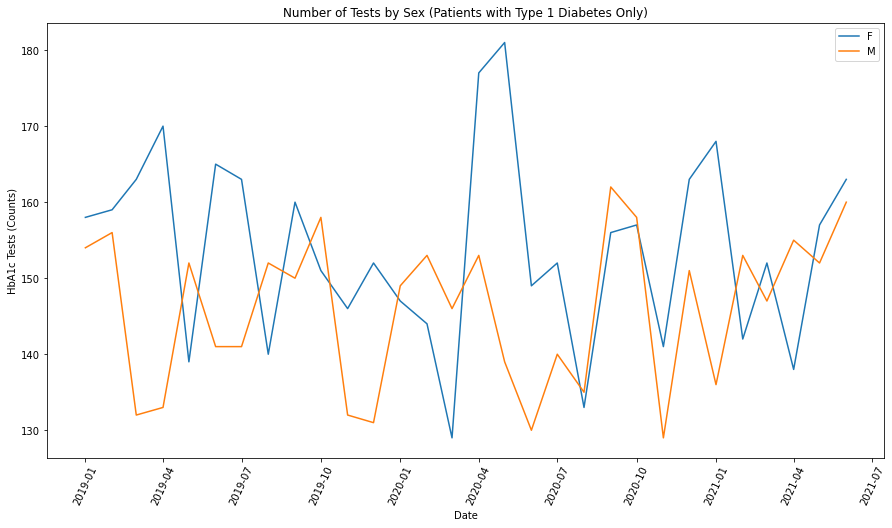

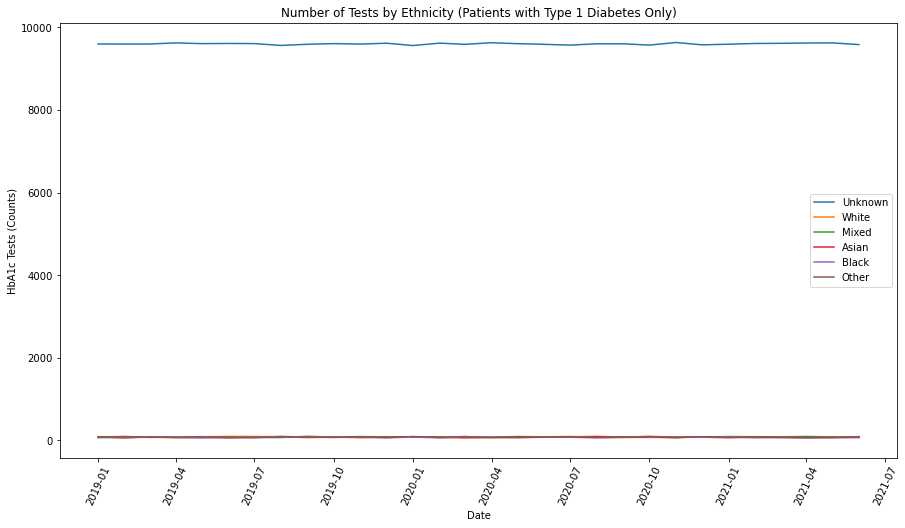

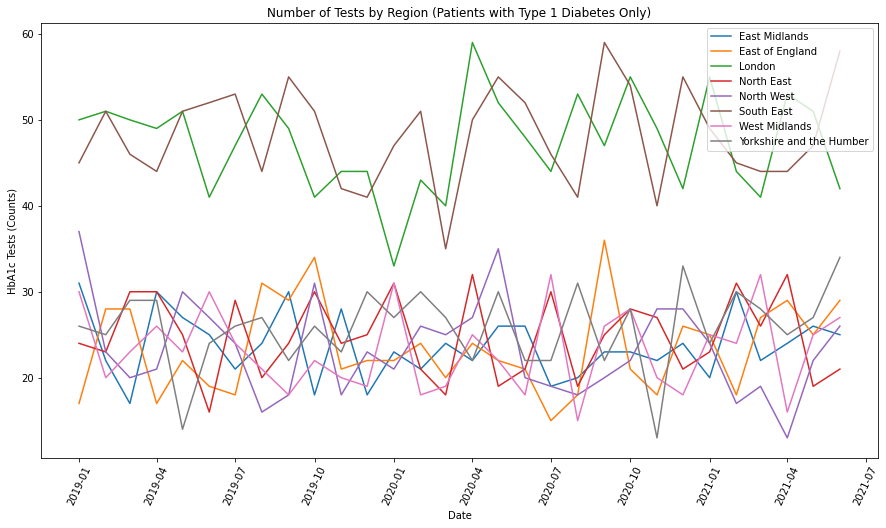

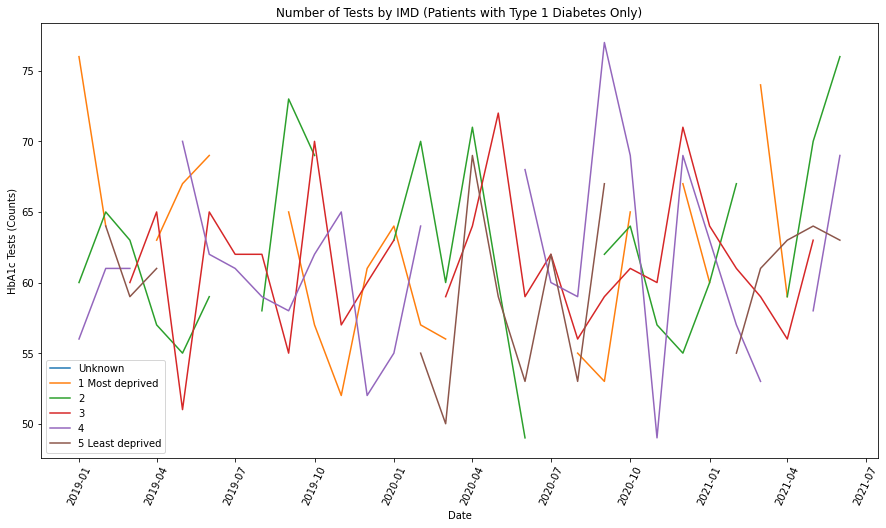

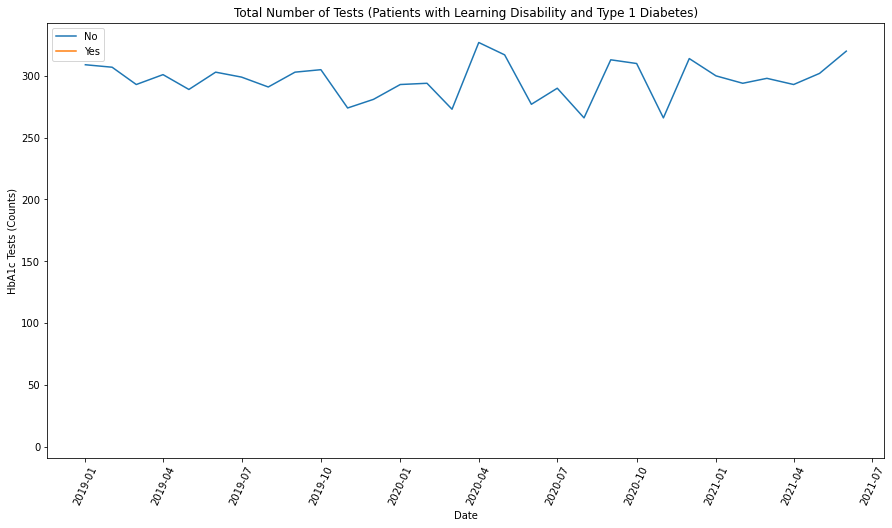

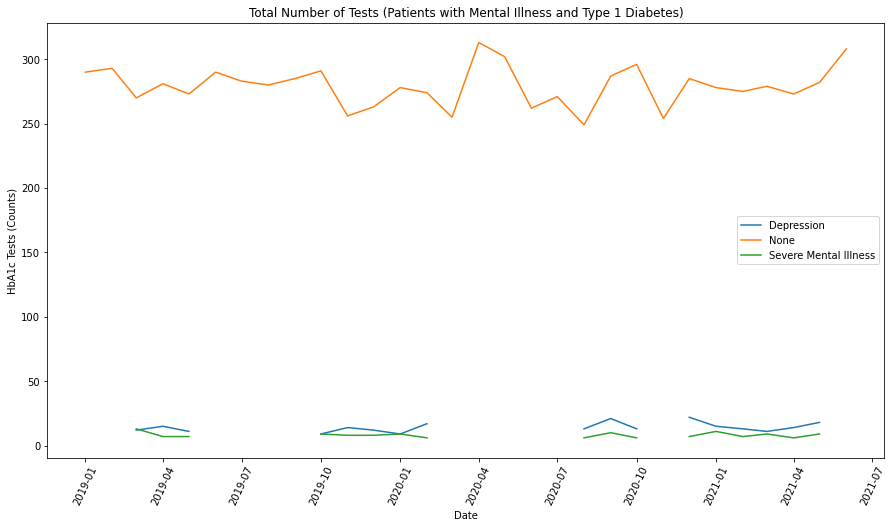

In [18]:
# Population
create_chart('population', 'HbA1c Tests (Counts)', 
             'Number of Tests (Patients with Type 1 Diabetes Only)',
             'population', df_pop_t1, y_min_t1)

# Age
create_chart('population', 'HbA1c Tests (Counts)', 
             'Number of Tests by Age (Patients with Type 1 Diabetes Only)',
             'age_group', df_age_t1.loc[df_age_t1.age_group != 'missing'], 
             y_min_t1)

# Sex
create_chart('population', 'HbA1c Tests (Counts)', 
             'Number of Tests by Sex (Patients with Type 1 Diabetes Only)',
             'sex', df_sex_t1.loc[df_sex_t1.sex.isin(['F','M'])], 
             y_min_t1)

# Ethnicity
create_chart('population', 'HbA1c Tests (Counts)', 
             'Number of Tests by Ethnicity (Patients with Type 1 Diabetes Only)',
             'ethnicity', df_eth, y_min_t1)

# Region
create_chart('population', 'HbA1c Tests (Counts)', 
             'Number of Tests by Region (Patients with Type 1 Diabetes Only)',
             'region', df_region_t1, y_min_t1)

# IMD
create_chart('population', 'HbA1c Tests (Counts)', 
             'Number of Tests by IMD (Patients with Type 1 Diabetes Only)',
             'imd', df_imd_t1, y_min_t1)

# Learning Disability
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests (Patients with Learning Disability and Type 1 Diabetes)',
             'learning_disability', df_ld_t1, y_min_t1)

# Mental Illness
create_chart('population', 'HbA1c Tests (Counts)', 
             'Total Number of Tests (Patients with Mental Illness and Type 1 Diabetes)',
             'mental_illness', df_mi_t1, y_min_t1)

## Percentage of Abnormal Results of All Tests (Patients with Type 1 Diabetes Only)

In [19]:
y_min_t1_pct = 80

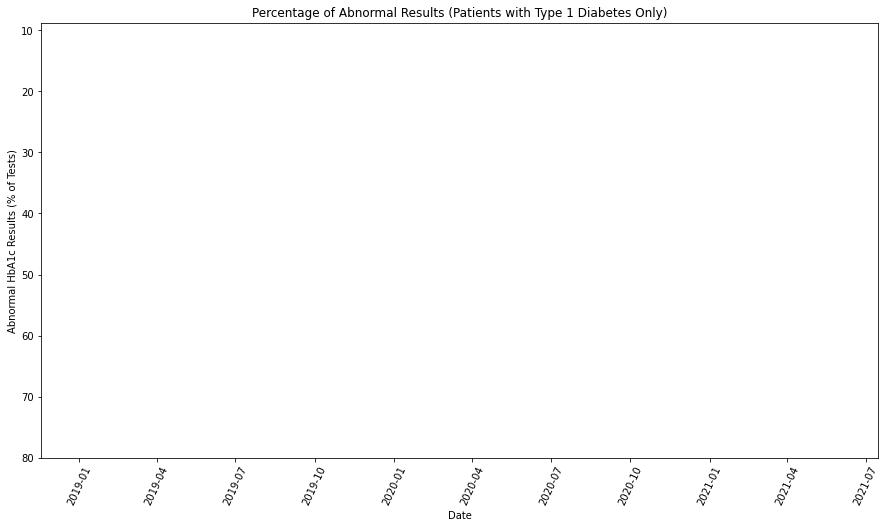

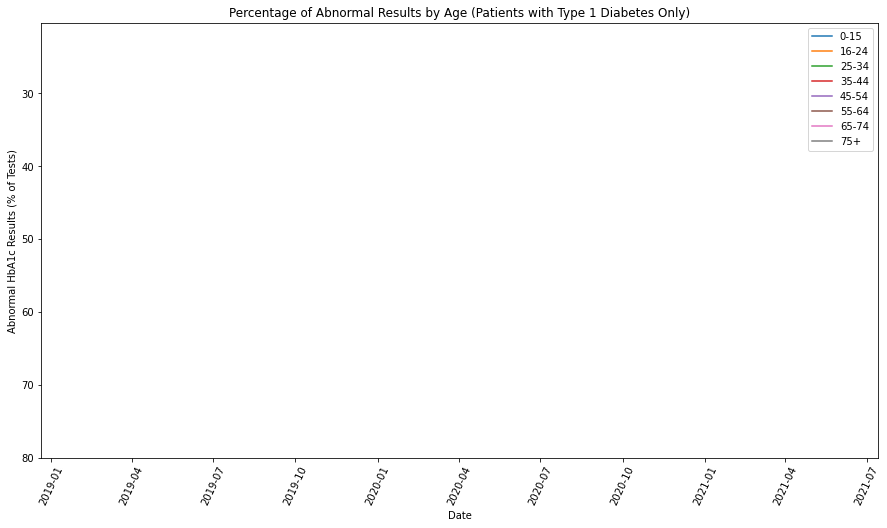

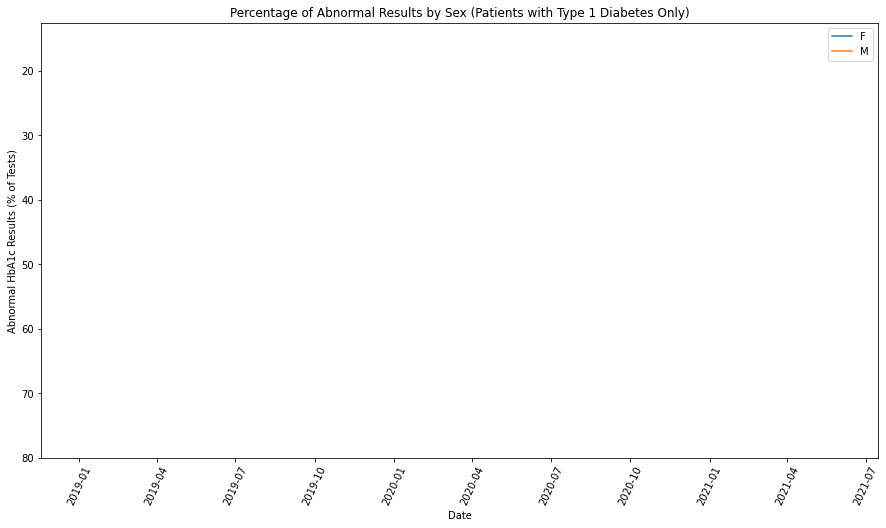

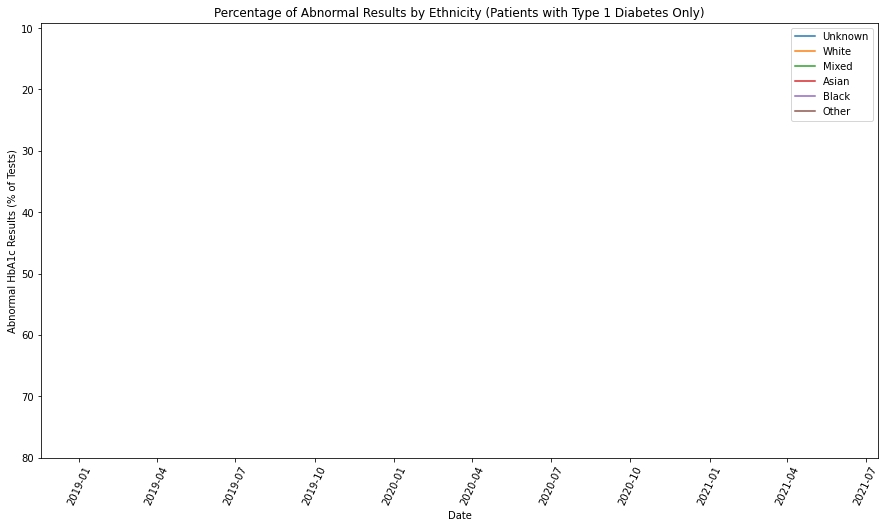

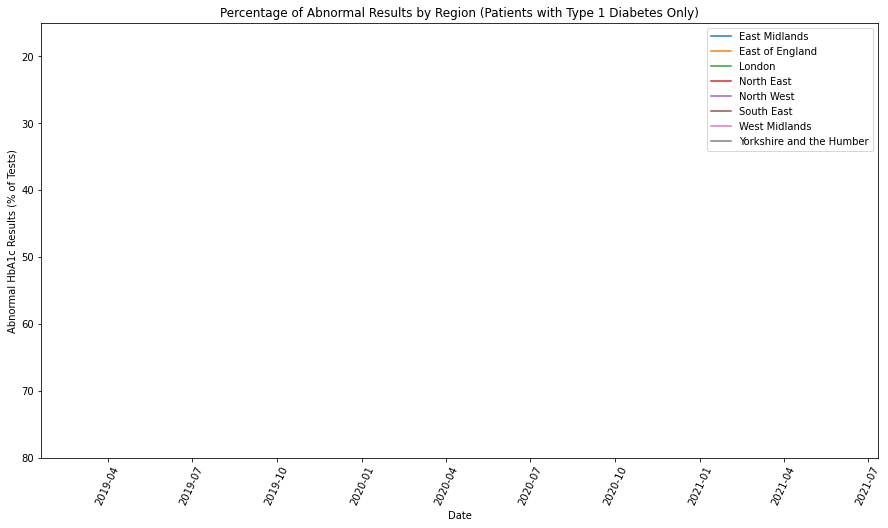

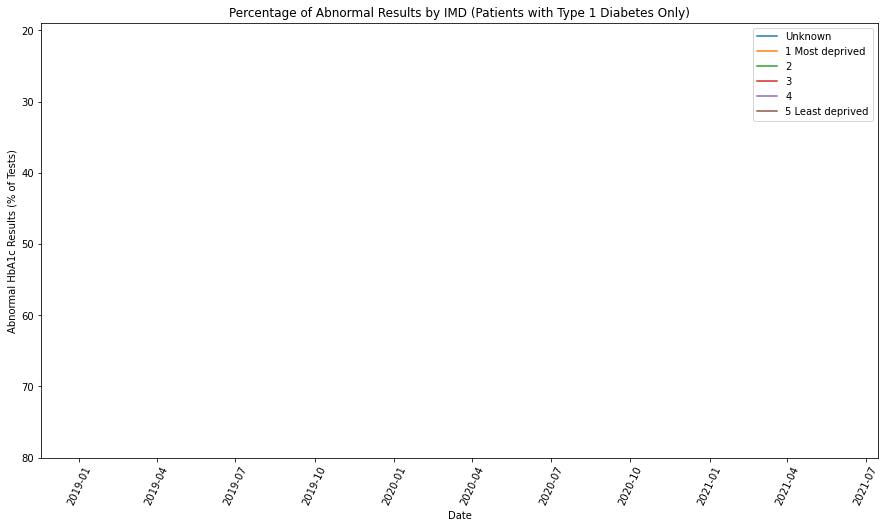

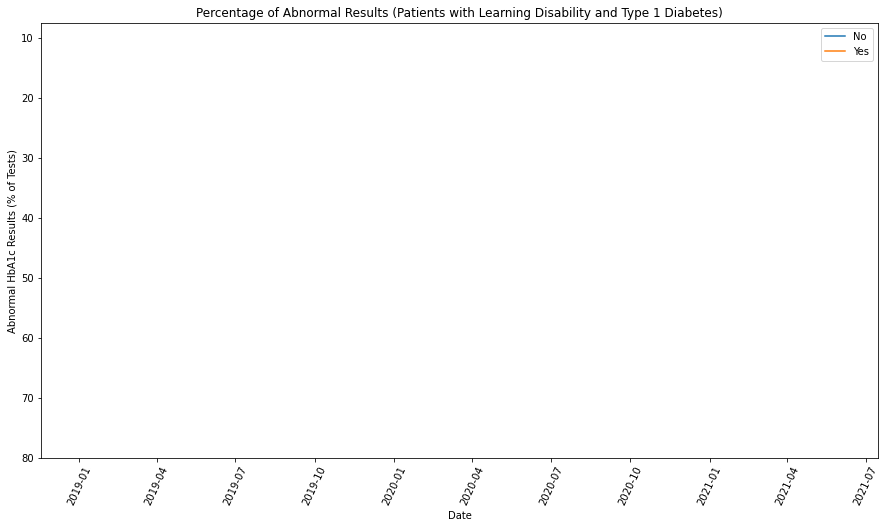

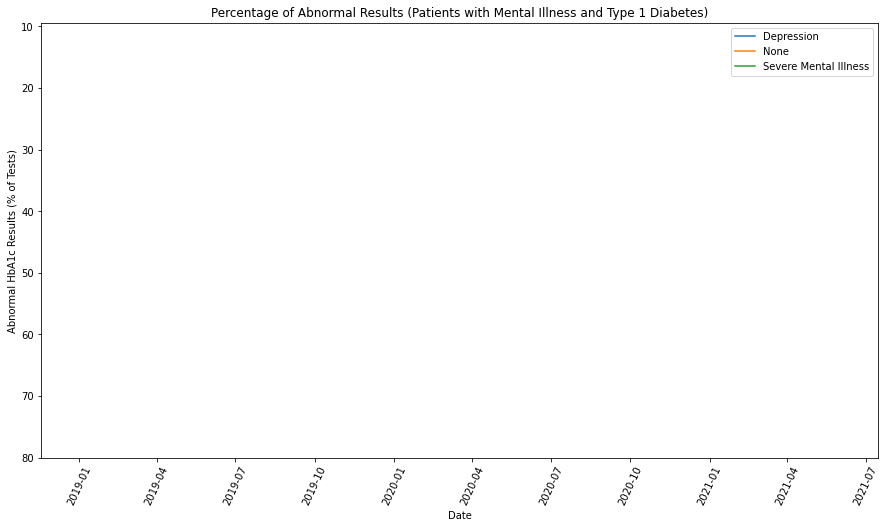

In [20]:
# Population
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (Patients with Type 1 Diabetes Only)',
             'population', df_pop_t1, y_min_t1_pct)

# Age
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Age (Patients with Type 1 Diabetes Only)',
             'age_group', df_age_t1.loc[df_age_t1.age_group != 'missing'], 
             y_min_t1_pct)

# Sex
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Sex (Patients with Type 1 Diabetes Only)',
             'sex', df_sex_t1.loc[df_sex_t1.sex.isin(['F','M'])], y_min_t1_pct)

# Ethnicity
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Ethnicity (Patients with Type 1 Diabetes Only)',
             'ethnicity', df_eth_t1, y_min_t1_pct)

# Region
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Region (Patients with Type 1 Diabetes Only)',
             'region', df_region_t1, y_min_t1_pct)

# IMD
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by IMD (Patients with Type 1 Diabetes Only)',
             'imd', df_imd_t1, y_min_t1_pct)

# Learning Disability
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (Patients with Learning Disability and Type 1 Diabetes)',
             'learning_disability', df_ld_t1, y_min_t1_pct)

# Mental Illness
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (Patients with Mental Illness and Type 1 Diabetes)',
             'mental_illness', df_mi_t1, y_min_t1_pct)

## Tables (Patients with Type 1 Diabetes Only)

In [21]:
measures = ['hba1c_abnormal', 'population', 'pct']

# Population
display(df_pop_t1[['date'] + measures])

# Age
display(df_age_t1[['date', 'age_group'] + measures])

# Sex
display(df_sex_t1[['date', 'sex'] + measures])

# Ethnicity
display(df_eth_t1[['date', 'ethnicity'] + measures])

# Region
display(df_region_t1[['date', 'region'] + measures])

# IMD
display(df_imd_t1[['date', 'imd'] + measures])

# LD
display(df_ld_t1[['date', 'learning_disability'] + measures])

# Mental Illness
display(df_mi_t1[['date', 'mental_illness'] + measures])

date  hba1c_abnormal  population       pct
1  2019-01-01            17.0         312  5.448718
3  2019-02-01            21.0         315  6.666667
5  2019-03-01            21.0         295  7.118644
7  2019-04-01            17.0         303  5.610561
9  2019-05-01            17.0         291  5.841924
11 2019-06-01            26.0         306  8.496732
13 2019-07-01            15.0         304  4.934211
15 2019-08-01            13.0         292  4.452055
17 2019-09-01            21.0         310  6.774194
19 2019-10-01            19.0         309  6.148867
21 2019-11-01            18.0         278  6.474820
23 2019-12-01            10.0         283  3.533569
25 2020-01-01            20.0         296  6.756757
27 2020-02-01            20.0         297  6.734007
29 2020-03-01            20.0         275  7.272727
31 2020-04-01            27.0         330  8.181818
33 2020-05-01            24.0         320  7.500000
35 2020-06-01            18.0         279  6.451613
37 2020-07-01            18.0         292  6.164384
39 2020-08-01            19.0         268  7.089552
41 2020-09-01            15.0         318  4.716981
43 2020-10-01            14.0         315  4.444444
45 2020-11-01            19.0         270  7.037037
47 2020-12-01            20.0         314  6.369427
49 2021-01-01            22.0         304  7.236842
51 2021-02-01            23.0         295  7.796610
53 2021-03-01            22.0         299  7.357860
55 2021-04-01            14.0         293  4.778157
57 2021-05-01            16.0         309  5.177994
59 2021-06-01            20.0         323  6.191950

date age_group  hba1c_abnormal  population        pct
1   2019-01-01      0-15             NaN        53.0        NaN
3   2019-01-01     16-24             NaN        30.0        NaN
5   2019-01-01     25-34             NaN        26.0        NaN
7   2019-01-01     35-44             NaN        54.0        NaN
9   2019-01-01     45-54             NaN        34.0        NaN
11  2019-01-01     55-64             NaN        35.0        NaN
13  2019-01-01     65-74             NaN        31.0        NaN
15  2019-01-01       75+             NaN        43.0        NaN
17  2019-01-01   missing             NaN         6.0        NaN
19  2019-02-01      0-15             NaN        57.0        NaN
21  2019-02-01     16-24             NaN        34.0        NaN
23  2019-02-01     25-34             NaN        34.0        NaN
25  2019-02-01     35-44             NaN        47.0        NaN
27  2019-02-01     45-54             NaN         NaN        NaN
29  2019-02-01     55-64             NaN        35.0        NaN
31  2019-02-01     65-74             0.0        34.0   0.000000
33  2019-02-01       75+             NaN        39.0        NaN
35  2019-02-01   missing             0.0         NaN        NaN
37  2019-03-01      0-15             NaN        60.0        NaN
39  2019-03-01     16-24             NaN        30.0        NaN
41  2019-03-01     25-34             NaN        33.0        NaN
43  2019-03-01     35-44             7.0        53.0  13.207547
45  2019-03-01     45-54             NaN        26.0        NaN
47  2019-03-01     55-64             0.0         NaN        NaN
49  2019-03-01     65-74             NaN        31.0        NaN
51  2019-03-01       75+             NaN        41.0        NaN
53  2019-03-01   missing             NaN         NaN        NaN
55  2019-04-01      0-15             6.0        62.0   9.677419
57  2019-04-01     16-24             NaN         NaN        NaN
59  2019-04-01     25-34             NaN        42.0        NaN
61  2019-04-01     35-44             NaN        48.0        NaN
63  2019-04-01     45-54             NaN        33.0        NaN
65  2019-04-01     55-64             NaN        24.0        NaN
67  2019-04-01     65-74             NaN        37.0        NaN
69  2019-04-01       75+             NaN        33.0        NaN
71  2019-04-01   missing             0.0         NaN        NaN
73  2019-05-01      0-15             NaN        55.0        NaN
75  2019-05-01     16-24             NaN         NaN        NaN
77  2019-05-01     25-34             NaN        29.0        NaN
79  2019-05-01     35-44             NaN        39.0        NaN
81  2019-05-01     45-54             NaN        39.0        NaN
83  2019-05-01     55-64             NaN        33.0        NaN
85  2019-05-01     65-74             NaN        31.0        NaN
87  2019-05-01       75+             0.0        36.0   0.000000
89  2019-05-01   missing             NaN         NaN        NaN
91  2019-06-01      0-15             8.0        59.0  13.559322
93  2019-06-01     16-24             NaN        26.0        NaN
95  2019-06-01     25-34             0.0        27.0   0.000000
97  2019-06-01     35-44             NaN        59.0        NaN
99  2019-06-01     45-54             0.0         NaN        NaN
101 2019-06-01     55-64             NaN        30.0        NaN
103 2019-06-01     65-74             NaN        43.0        NaN
105 2019-06-01       75+             NaN        36.0        NaN
107 2019-06-01   missing             0.0         NaN        NaN
109 2019-07-01      0-15             NaN        62.0        NaN
111 2019-07-01     16-24             NaN         NaN        NaN
113 2019-07-01     25-34             NaN        32.0        NaN
115 2019-07-01     35-44             NaN        44.0        NaN
117 2019-07-01     45-54             NaN        29.0        NaN
119 2019-07-01     55-64             NaN        35.0        NaN
121 2019-07-01     65-74             0.0        37.0   0.000000
123 2019-07-01       75+             NaN  

date sex  hba1c_abnormal  population        pct
1   2019-01-01   F             8.0         158   5.063291
3   2019-01-01   M             9.0         154   5.844156
5   2019-02-01   F             7.0         159   4.402516
7   2019-02-01   M            14.0         156   8.974359
9   2019-03-01   F            12.0         163   7.361963
11  2019-03-01   M             9.0         132   6.818182
13  2019-04-01   F             9.0         170   5.294118
15  2019-04-01   M             8.0         133   6.015038
17  2019-05-01   F             9.0         139   6.474820
19  2019-05-01   M             8.0         152   5.263158
21  2019-06-01   F            14.0         165   8.484848
23  2019-06-01   M            12.0         141   8.510638
25  2019-07-01   F             9.0         163   5.521472
27  2019-07-01   M             6.0         141   4.255319
29  2019-08-01   F             5.0         140   3.571429
31  2019-08-01   M             8.0         152   5.263158
33  2019-09-01   F            11.0         160   6.875000
35  2019-09-01   M            10.0         150   6.666667
37  2019-10-01   F            16.0         151  10.596026
39  2019-10-01   M             3.0         158   1.898734
41  2019-11-01   F            10.0         146   6.849315
43  2019-11-01   M             8.0         132   6.060606
45  2019-12-01   F             9.0         152   5.921053
47  2019-12-01   M             1.0         131   0.763359
49  2020-01-01   F             6.0         147   4.081633
51  2020-01-01   M            14.0         149   9.395973
53  2020-02-01   F             8.0         144   5.555556
55  2020-02-01   M            12.0         153   7.843137
57  2020-03-01   F            13.0         129  10.077519
59  2020-03-01   M             7.0         146   4.794521
61  2020-04-01   F            12.0         177   6.779661
63  2020-04-01   M            15.0         153   9.803922
65  2020-05-01   F            14.0         181   7.734807
67  2020-05-01   M            10.0         139   7.194245
69  2020-06-01   F             6.0         149   4.026846
71  2020-06-01   M            12.0         130   9.230769
73  2020-07-01   F             8.0         152   5.263158
75  2020-07-01   M            10.0         140   7.142857
77  2020-08-01   F             9.0         133   6.766917
79  2020-08-01   M            10.0         135   7.407407
81  2020-09-01   F             5.0         156   3.205128
83  2020-09-01   M            10.0         162   6.172840
85  2020-10-01   F             7.0         157   4.458599
87  2020-10-01   M             7.0         158   4.430380
89  2020-11-01   F             7.0         141   4.964539
91  2020-11-01   M            12.0         129   9.302326
93  2020-12-01   F            12.0         163   7.361963
95  2020-12-01   M             8.0         151   5.298013
97  2021-01-01   F            10.0         168   5.952381
99  2021-01-01   M            12.0         136   8.823529
101 2021-02-01   F            17.0         142  11.971831
103 2021-02-01   M             6.0         153   3.921569
105 2021-03-01   F             8.0         152   5.263158
107 2021-03-01   M            14.0         147   9.523810
109 2021-04-01   F             5.0         138   3.623188
111 2021-04-01   M             9.0         155   5.806452
113 2021-05-01   F             7.0         157   4.458599
115 2021-05-01   M             9.0         152   5.921053
117 2021-06-01   F            10.0         163   6.134969
119 2021-06-01   M            10.0         160   6.250000

date ethnicity  hba1c_abnormal  population       pct
1   2019-01-01   Unknown            16.0       294.0  5.442177
3   2019-01-01     White             NaN         NaN       NaN
5   2019-01-01     Mixed             0.0         NaN       NaN
7   2019-01-01     Asian             0.0         NaN       NaN
9   2019-01-01     Black             0.0         NaN       NaN
11  2019-01-01     Other             0.0         NaN       NaN
13  2019-02-01   Unknown            20.0       303.0  6.600660
15  2019-02-01     White             NaN         NaN       NaN
17  2019-02-01     Mixed             0.0         NaN       NaN
19  2019-02-01     Asian             0.0         NaN       NaN
21  2019-02-01     Black             0.0         NaN       NaN
23  2019-02-01     Other             0.0         NaN       NaN
25  2019-03-01   Unknown            21.0       283.0  7.420495
27  2019-03-01     White             0.0         NaN       NaN
29  2019-03-01     Mixed             0.0         NaN       NaN
31  2019-03-01     Asian             0.0         NaN       NaN
33  2019-03-01     Black             0.0         NaN       NaN
35  2019-03-01     Other             0.0         NaN       NaN
37  2019-04-01   Unknown            16.0       291.0  5.498282
39  2019-04-01     White             NaN         NaN       NaN
41  2019-04-01     Mixed             0.0         NaN       NaN
43  2019-04-01     Asian             0.0         NaN       NaN
45  2019-04-01     Black             0.0         NaN       NaN
47  2019-04-01     Other             NaN         NaN       NaN
49  2019-05-01   Unknown            14.0       275.0  5.090909
51  2019-05-01     White             0.0         NaN       NaN
53  2019-05-01     Mixed             NaN         NaN       NaN
55  2019-05-01     Asian             0.0         NaN       NaN
57  2019-05-01     Black             NaN         NaN       NaN
59  2019-05-01     Other             NaN         NaN       NaN
61  2019-06-01   Unknown            26.0       299.0  8.695652
63  2019-06-01     White             0.0         NaN       NaN
65  2019-06-01     Mixed             NaN         NaN       NaN
67  2019-06-01     Asian             0.0         NaN       NaN
69  2019-06-01     Black             0.0         NaN       NaN
71  2019-06-01     Other             0.0         NaN       NaN
73  2019-07-01   Unknown            14.0       295.0  4.745763
75  2019-07-01     White             0.0         NaN       NaN
77  2019-07-01     Mixed             NaN         NaN       NaN
79  2019-07-01     Asian             NaN         NaN       NaN
81  2019-07-01     Black             0.0         NaN       NaN
83  2019-07-01     Other             0.0         NaN       NaN
85  2019-08-01   Unknown            13.0       274.0  4.744526
87  2019-08-01     White             0.0         NaN       NaN
89  2019-08-01     Mixed             0.0         NaN       NaN
91  2019-08-01     Asian             0.0         NaN       NaN
93  2019-08-01     Black             0.0         NaN       NaN
95  2019-08-01     Other             0.0        10.0  0.000000
97  2019-09-01   Unknown            19.0       297.0  6.397306
99  2019-09-01     White             0.0         NaN       NaN
101 2019-09-01     Mixed             0.0         NaN       NaN
103 2019-09-01     Asian             NaN         NaN       NaN
105 2019-09-01     Black             0.0         NaN       NaN
107 2019-09-01     Other             NaN         NaN       NaN
109 2019-10-01   Unknown            19.0       302.0  6.291391
111 2019-10-01     White             0.0         NaN       NaN
113 2019-10-01     Mixed             0.0         NaN       NaN
115 2019-10-01     Asian             0.0         NaN       NaN
117 2019-10-01     Black             NaN         NaN       NaN
119 2019-10-01     Other             0.0         NaN       NaN
121 2019-11-01   Unknown            16.0       266.0  6.015038
123 2019-11-01     White             NaN         NaN       NaN
125 2019-11-01     Mixed             0.0 

date                    region  hba1c_abnormal  population  \
1   2019-01-01                       NaN             NaN          52   
3   2019-01-01             East Midlands             NaN          31   
5   2019-01-01           East of England             NaN          17   
7   2019-01-01                    London             NaN          50   
9   2019-01-01                North East             NaN          24   
11  2019-01-01                North West             NaN          37   
13  2019-01-01                South East             NaN          45   
15  2019-01-01             West Midlands             NaN          30   
17  2019-01-01  Yorkshire and the Humber             NaN          26   
19  2019-02-01                       NaN             NaN          72   
21  2019-02-01             East Midlands             NaN          22   
23  2019-02-01           East of England             NaN          28   
25  2019-02-01                    London             NaN          51   
27  2019-02-01                North East             NaN          23   
29  2019-02-01                North West             NaN          23   
31  2019-02-01                South East             NaN          51   
33  2019-02-01             West Midlands             NaN          20   
35  2019-02-01  Yorkshire and the Humber             NaN          25   
37  2019-03-01                       NaN             NaN          52   
39  2019-03-01             East Midlands             NaN          17   
41  2019-03-01           East of England             NaN          28   
43  2019-03-01                    London             NaN          50   
45  2019-03-01                North East             NaN          30   
47  2019-03-01                North West             0.0          20   
49  2019-03-01                South East             NaN          46   
51  2019-03-01             West Midlands             NaN          23   
53  2019-03-01  Yorkshire and the Humber             NaN          29   
55  2019-04-01                       NaN             NaN          57   
57  2019-04-01             East Midlands             NaN          30   
59  2019-04-01           East of England             NaN          17   
61  2019-04-01                    London             NaN          49   
63  2019-04-01                North East             NaN          30   
65  2019-04-01                North West             NaN          21   
67  2019-04-01                South East             NaN          44   
69  2019-04-01             West Midlands             NaN          26   
71  2019-04-01  Yorkshire and the Humber             0.0          29   
73  2019-05-01                       NaN             NaN          48   
75  2019-05-01             East Midlands             NaN          27   
77  2019-05-01           East of England             0.0          22   
79  2019-05-01                    London             NaN          51   
81  2019-05-01                North East             0.0          25   
83  2019-05-01                North West             NaN          30   
85  2019-05-01                South East             NaN          51   
87  2019-05-01             West Midlands             NaN          23   
89  2019-05-01  Yorkshire and the Humber             NaN          14   
91  2019-06-01                       NaN             7.0          72   
93  2019-06-01             East Midlands             0.0          25   
95  2019-06-01           East of England             NaN          19   
97  2019-06-01                    London             NaN          41   
99  2019-06-01                North East             0.0          16   
101 2019-06-01                North West             NaN          27   
103 2019-06-01                South East             NaN          52   
105 2019-06-01             West Midlands             NaN          30   
107 2019-06-01  Yorkshire and the Humber             NaN          24   
109 2019-07-01                       NaN          

date               imd  hba1c_abnormal  population        pct
1   2019-01-01           Unknown             0.0         NaN        NaN
3   2019-01-01   1 Most deprived             7.0        76.0   9.210526
5   2019-01-01                 2             NaN        60.0        NaN
7   2019-01-01                 3             NaN        71.0        NaN
9   2019-01-01                 4             NaN        56.0        NaN
11  2019-01-01  5 Least deprived             NaN         NaN        NaN
13  2019-02-01           Unknown             NaN         NaN        NaN
15  2019-02-01   1 Most deprived             NaN        64.0        NaN
17  2019-02-01                 2             6.0        65.0   9.230769
19  2019-02-01                 3             NaN         NaN        NaN
21  2019-02-01                 4             NaN        61.0        NaN
23  2019-02-01  5 Least deprived             7.0        64.0  10.937500
25  2019-03-01           Unknown             0.0         NaN        NaN
27  2019-03-01   1 Most deprived             NaN         NaN        NaN
29  2019-03-01                 2             6.0        63.0   9.523810
31  2019-03-01                 3             6.0        60.0  10.000000
33  2019-03-01                 4             NaN        61.0        NaN
35  2019-03-01  5 Least deprived             NaN        59.0        NaN
37  2019-04-01           Unknown             0.0         NaN        NaN
39  2019-04-01   1 Most deprived             NaN        63.0        NaN
41  2019-04-01                 2             NaN        57.0        NaN
43  2019-04-01                 3             NaN        65.0        NaN
45  2019-04-01                 4             NaN         NaN        NaN
47  2019-04-01  5 Least deprived             NaN        61.0        NaN
49  2019-05-01           Unknown             0.0         NaN        NaN
51  2019-05-01   1 Most deprived             6.0        67.0   8.955224
53  2019-05-01                 2             NaN        55.0        NaN
55  2019-05-01                 3             NaN        51.0        NaN
57  2019-05-01                 4             NaN        70.0        NaN
59  2019-05-01  5 Least deprived             NaN         NaN        NaN
61  2019-06-01           Unknown             0.0         NaN        NaN
63  2019-06-01   1 Most deprived             NaN        69.0        NaN
65  2019-06-01                 2             6.0        59.0  10.169492
67  2019-06-01                 3             7.0        65.0  10.769231
69  2019-06-01                 4             NaN        62.0        NaN
71  2019-06-01  5 Least deprived             NaN         NaN        NaN
73  2019-07-01           Unknown             0.0         NaN        NaN
75  2019-07-01   1 Most deprived             NaN         NaN        NaN
77  2019-07-01                 2             NaN         NaN        NaN
79  2019-07-01                 3             NaN        62.0        NaN
81  2019-07-01                 4             NaN        61.0        NaN
83  2019-07-01  5 Least deprived             NaN         NaN        NaN
85  2019-08-01           Unknown             0.0         NaN        NaN
87  2019-08-01   1 Most deprived             NaN         NaN        NaN
89  2019-08-01                 2             NaN        58.0        NaN
91  2019-08-01                 3             NaN        62.0        NaN
93  2019-08-01                 4             NaN        59.0        NaN
95  2019-08-01  5 Least deprived             NaN        64.0        NaN
97  2019-09-01           Unknown             0.0         NaN        NaN
99  2019-09-01   1 Most deprived             7.0        65.0  10.769231
101 2019-09-01                 2             6.0        73.0   8.219178
103 2019-09-01                 3             NaN        55.0        NaN
105 2019-09-01                 4             NaN        58.0        NaN
107 2019-09-01  5 Least deprived             NaN         NaN        NaN
109 2019-10-01           Unknown             0.0  

date learning_disability  hba1c_abnormal  population       pct
1   2019-01-01                  No            17.0       309.0  5.501618
3   2019-01-01                 Yes             0.0         NaN       NaN
5   2019-02-01                  No             NaN       307.0       NaN
7   2019-02-01                 Yes             0.0         8.0  0.000000
9   2019-03-01                  No            21.0       293.0  7.167235
11  2019-03-01                 Yes             0.0         NaN       NaN
13  2019-04-01                  No             NaN       301.0       NaN
15  2019-04-01                 Yes             0.0         NaN       NaN
17  2019-05-01                  No            17.0       289.0  5.882353
19  2019-05-01                 Yes             0.0         NaN       NaN
21  2019-06-01                  No             NaN       303.0       NaN
23  2019-06-01                 Yes             NaN         NaN       NaN
25  2019-07-01                  No            14.0       299.0  4.682274
27  2019-07-01                 Yes             NaN         NaN       NaN
29  2019-08-01                  No            12.0       291.0  4.123711
31  2019-08-01                 Yes             NaN         NaN       NaN
33  2019-09-01                  No            20.0       303.0  6.600660
35  2019-09-01                 Yes             NaN         7.0       NaN
37  2019-10-01                  No            18.0       305.0  5.901639
39  2019-10-01                 Yes             NaN         NaN       NaN
41  2019-11-01                  No             NaN       274.0       NaN
43  2019-11-01                 Yes             0.0         NaN       NaN
45  2019-12-01                  No             NaN       281.0       NaN
47  2019-12-01                 Yes             0.0         NaN       NaN
49  2020-01-01                  No            19.0       293.0  6.484642
51  2020-01-01                 Yes             NaN         NaN       NaN
53  2020-02-01                  No             NaN       294.0       NaN
55  2020-02-01                 Yes             0.0         NaN       NaN
57  2020-03-01                  No             NaN       273.0       NaN
59  2020-03-01                 Yes             0.0         NaN       NaN
61  2020-04-01                  No             NaN       327.0       NaN
63  2020-04-01                 Yes             0.0         NaN       NaN
65  2020-05-01                  No             NaN       317.0       NaN
67  2020-05-01                 Yes             0.0         NaN       NaN
69  2020-06-01                  No            18.0       277.0  6.498195
71  2020-06-01                 Yes             0.0         NaN       NaN
73  2020-07-01                  No            18.0       290.0  6.206897
75  2020-07-01                 Yes             0.0         NaN       NaN
77  2020-08-01                  No            19.0       266.0  7.142857
79  2020-08-01                 Yes             0.0         NaN       NaN
81  2020-09-01                  No            15.0       313.0  4.792332
83  2020-09-01                 Yes             0.0         NaN       NaN
85  2020-10-01                  No             NaN       310.0       NaN
87  2020-10-01                 Yes             0.0         NaN       NaN
89  2020-11-01                  No             NaN       266.0       NaN
91  2020-11-01                 Yes             0.0         NaN       NaN
93  2020-12-01                  No             NaN       314.0       NaN
95  2020-12-01                 Yes             NaN         NaN       NaN
97  2021-01-01                  No             NaN       300.0       NaN
99  2021-01-01                 Yes             0.0         NaN       NaN
101 2021-02-01                  No             NaN       294.0       NaN
103 2021-02-01                 Yes             NaN         NaN       NaN
105 2021-03-01                  No             NaN       298.0       NaN
107 2021-03-01                 Yes             0.0         NaN      

date         mental_illness  hba1c_abnormal  population       pct
1   2019-01-01             Depression             0.0        12.0  0.000000
3   2019-01-01                   None            17.0       290.0  5.862069
5   2019-01-01  Severe Mental Illness             0.0        10.0  0.000000
7   2019-02-01             Depression             NaN         NaN       NaN
9   2019-02-01                   None            17.0       293.0  5.802048
11  2019-02-01  Severe Mental Illness             NaN         NaN       NaN
13  2019-03-01             Depression             0.0        12.0  0.000000
15  2019-03-01                   None            21.0       270.0  7.777778
17  2019-03-01  Severe Mental Illness             0.0        13.0  0.000000
19  2019-04-01             Depression             0.0        15.0  0.000000
21  2019-04-01                   None            17.0       281.0  6.049822
23  2019-04-01  Severe Mental Illness             0.0         7.0  0.000000
25  2019-05-01             Depression             NaN        11.0       NaN
27  2019-05-01                   None            16.0       273.0  5.860806
29  2019-05-01  Severe Mental Illness             0.0         7.0  0.000000
31  2019-06-01             Depression             0.0         NaN       NaN
33  2019-06-01                   None            26.0       290.0  8.965517
35  2019-06-01  Severe Mental Illness             0.0         NaN       NaN
37  2019-07-01             Depression             0.0        15.0  0.000000
39  2019-07-01                   None            14.0       283.0  4.946996
41  2019-07-01  Severe Mental Illness             NaN         6.0       NaN
43  2019-08-01             Depression             0.0         NaN       NaN
45  2019-08-01                   None            13.0       280.0  4.642857
47  2019-08-01  Severe Mental Illness             0.0         NaN       NaN
49  2019-09-01             Depression             NaN         NaN       NaN
51  2019-09-01                   None            20.0       285.0  7.017544
53  2019-09-01  Severe Mental Illness             0.0         NaN       NaN
55  2019-10-01             Depression             NaN         9.0       NaN
57  2019-10-01                   None             NaN       291.0       NaN
59  2019-10-01  Severe Mental Illness             0.0         9.0  0.000000
61  2019-11-01             Depression             0.0        14.0  0.000000
63  2019-11-01                   None            18.0       256.0  7.031250
65  2019-11-01  Severe Mental Illness             0.0         8.0  0.000000
67  2019-12-01             Depression             0.0        12.0  0.000000
69  2019-12-01                   None             NaN       263.0       NaN
71  2019-12-01  Severe Mental Illness             NaN         8.0       NaN
73  2020-01-01             Depression             NaN         9.0       NaN
75  2020-01-01                   None            19.0       278.0  6.834532
77  2020-01-01  Severe Mental Illness             0.0         9.0  0.000000
79  2020-02-01             Depression             NaN        17.0       NaN
81  2020-02-01                   None            19.0       274.0  6.934307
83  2020-02-01  Severe Mental Illness             0.0         6.0  0.000000
85  2020-03-01             Depression             NaN         NaN       NaN
87  2020-03-01                   None            18.0       255.0  7.058824
89  2020-03-01  Severe Mental Illness             0.0         NaN       NaN
91  2020-04-01             Depression             0.0         NaN       NaN
93  2020-04-01                   None            27.0       313.0  8.626198
95  2020-04-01  Severe Mental Illness             0.0         NaN       NaN
97  2020-05-01             Depression             NaN        12.0       NaN
99  2020-05-01                   None            23.0       302.0  7.615894
101 2020-05-01  Severe Mental Illness             0.0         6.0  0.000000
103 2020-06-01             Depression             0.0     

_________

## Count of Abnormal Results (Patients with Type 2 Diabetes Only)

In [22]:
y_min_t2 = 0

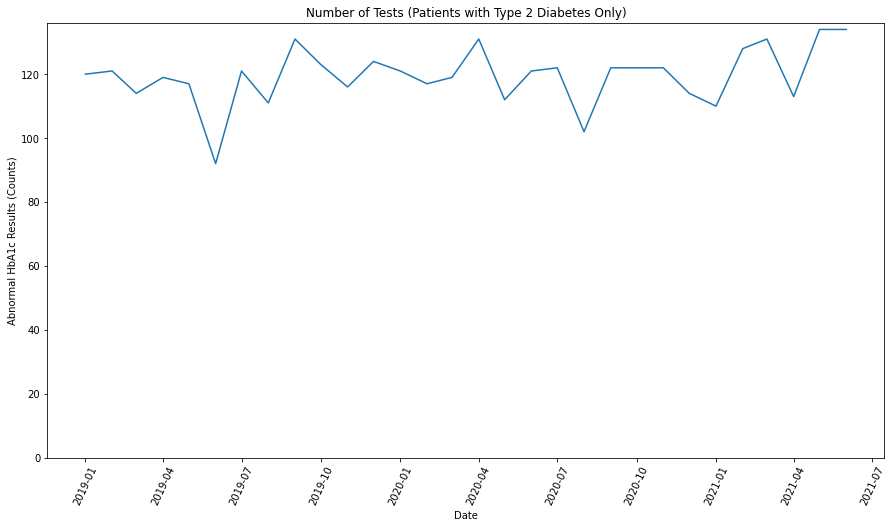

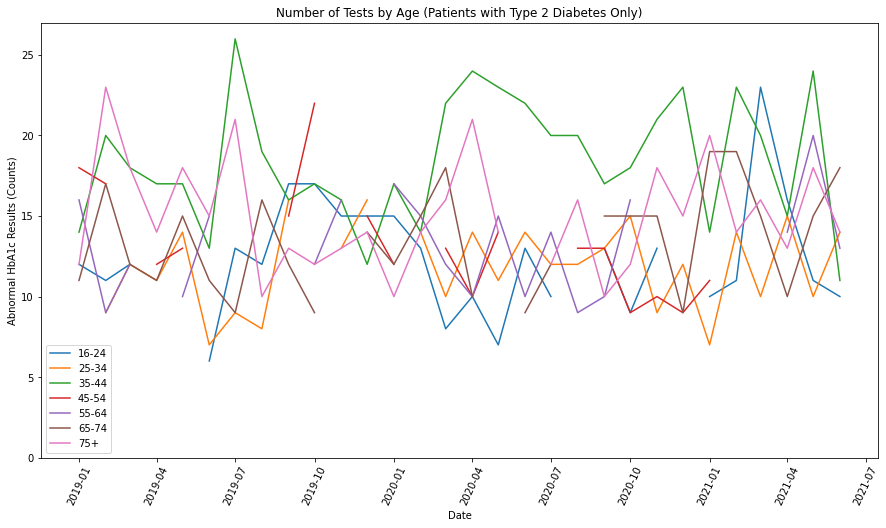

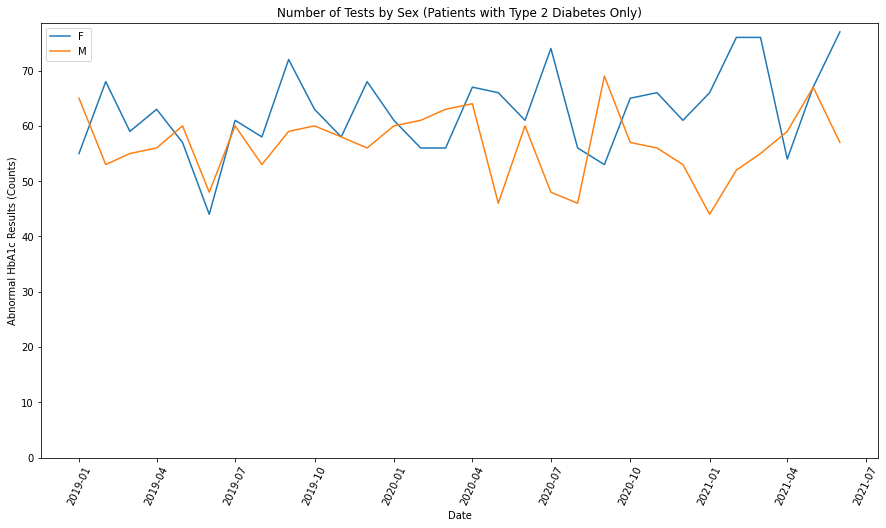

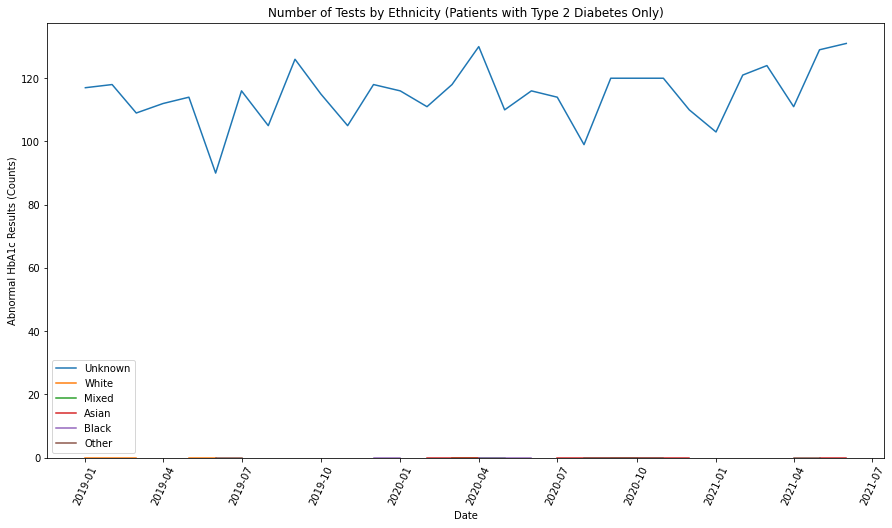

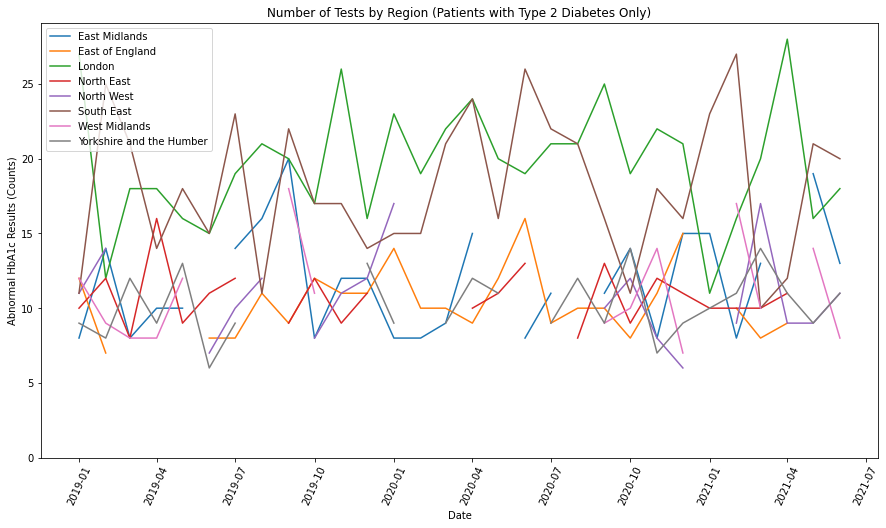

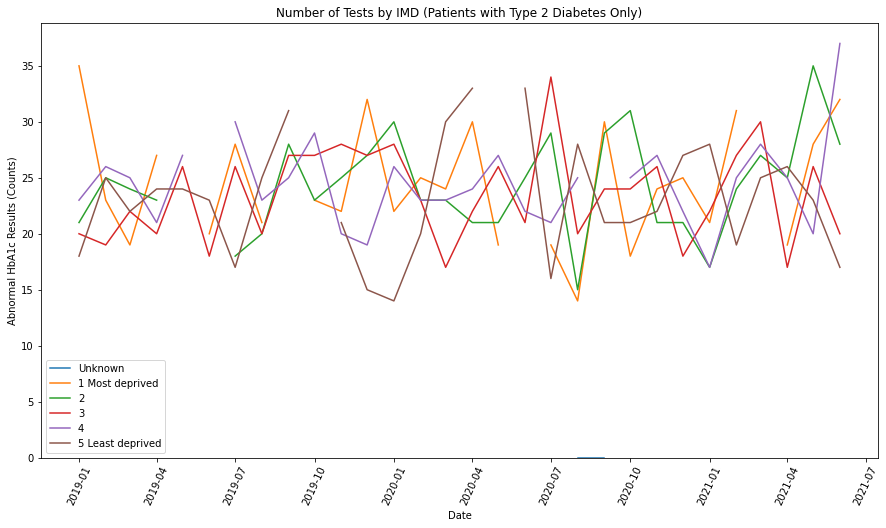

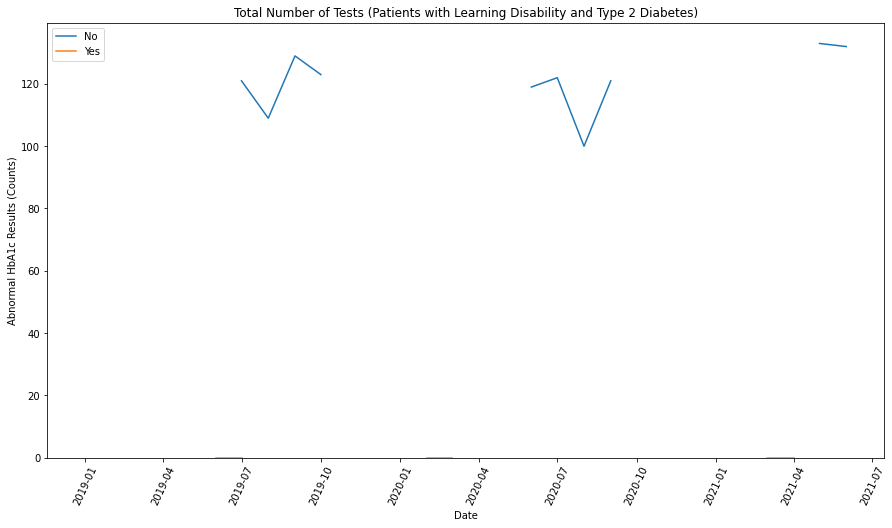

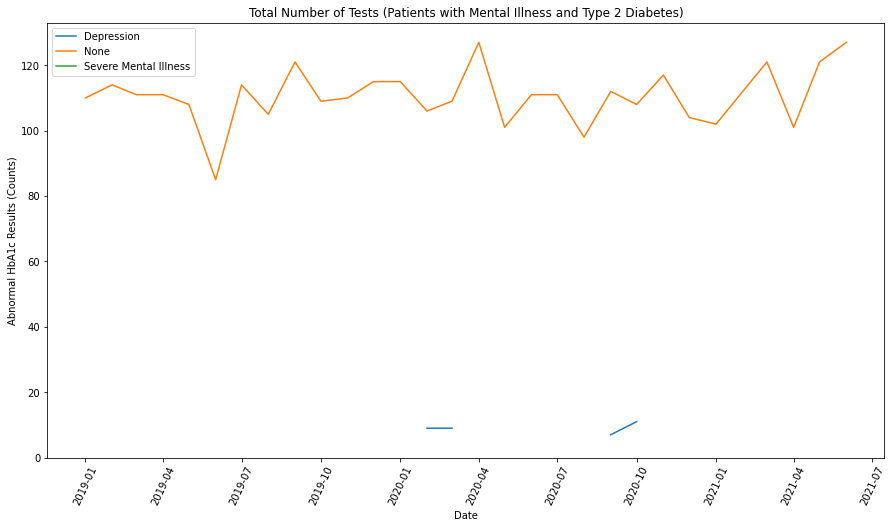

In [23]:
# Population
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Number of Tests (Patients with Type 2 Diabetes Only)',
             'population', df_pop_t2, y_min_t2)

# Age
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Age (Patients with Type 2 Diabetes Only)',
             'age_group', df_age_t2.loc[(df_age_t2.age_group != 'missing')], 
             y_min_t2)

# Sex
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Sex (Patients with Type 2 Diabetes Only)',
             'sex', df_sex_t2.loc[df_sex_t2.sex.isin(['F','M'])], y_min_t2)

# Ethnicity
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Ethnicity (Patients with Type 2 Diabetes Only)',
             'ethnicity', df_eth_t2, y_min_t2)

# Region
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Region (Patients with Type 2 Diabetes Only)',
             'region', df_region_t2, y_min_t2)

# IMD
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by IMD (Patients with Type 2 Diabetes Only)',
             'imd', df_imd_t2, y_min_t2)

# Learning Disability
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Total Number of Tests (Patients with Learning Disability and Type 2 Diabetes)',
             'learning_disability', df_ld_t2, y_min_t2)

# Mental Illness
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Total Number of Tests (Patients with Mental Illness and Type 2 Diabetes)',
             'mental_illness', df_mi_t2, y_min_t2)

## Count of All Tests (Patients with Type 2 Diabetes Only)

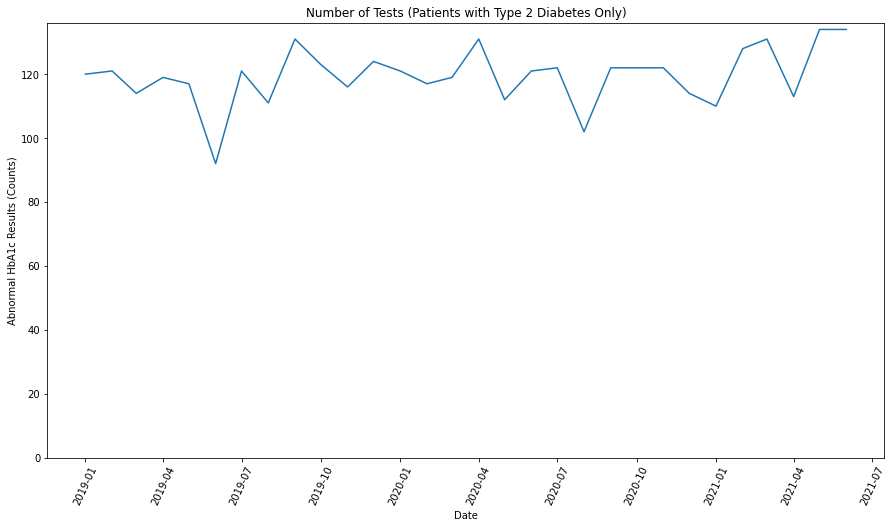

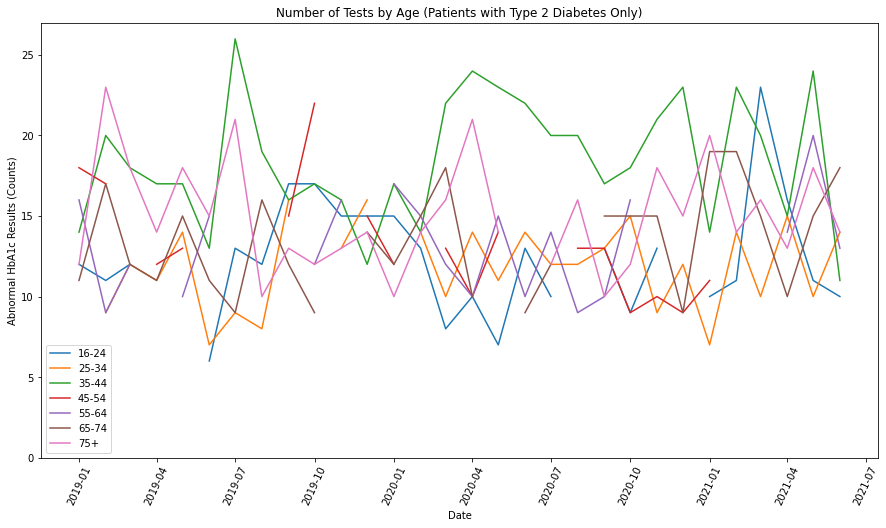

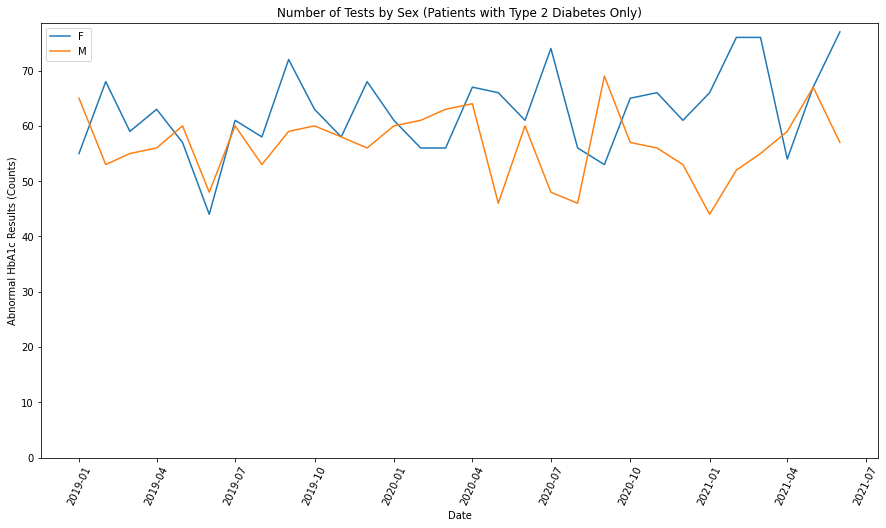

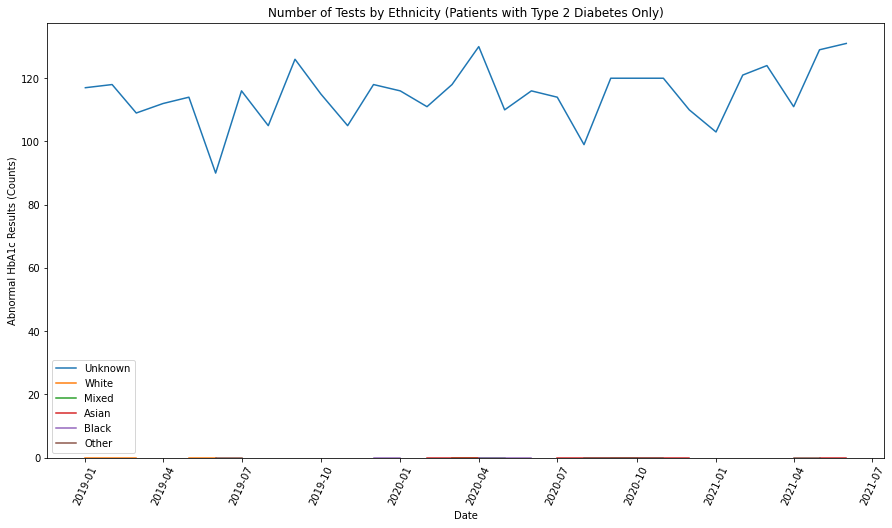

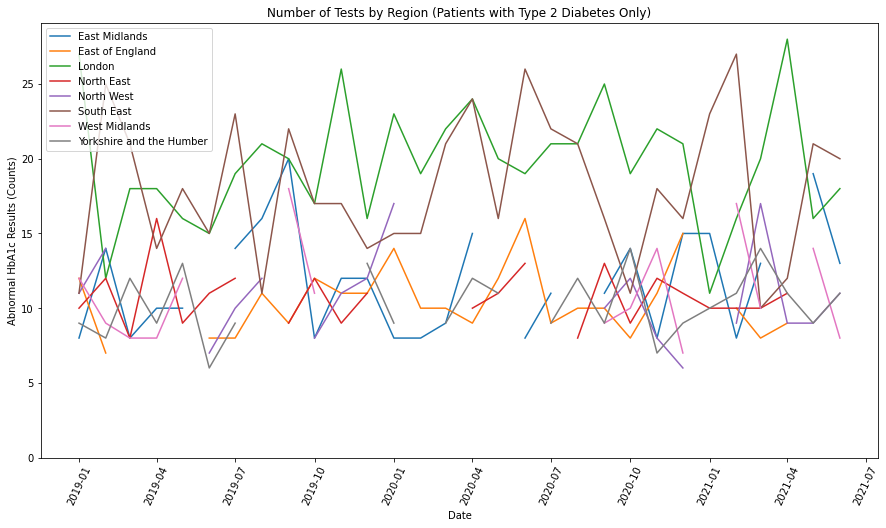

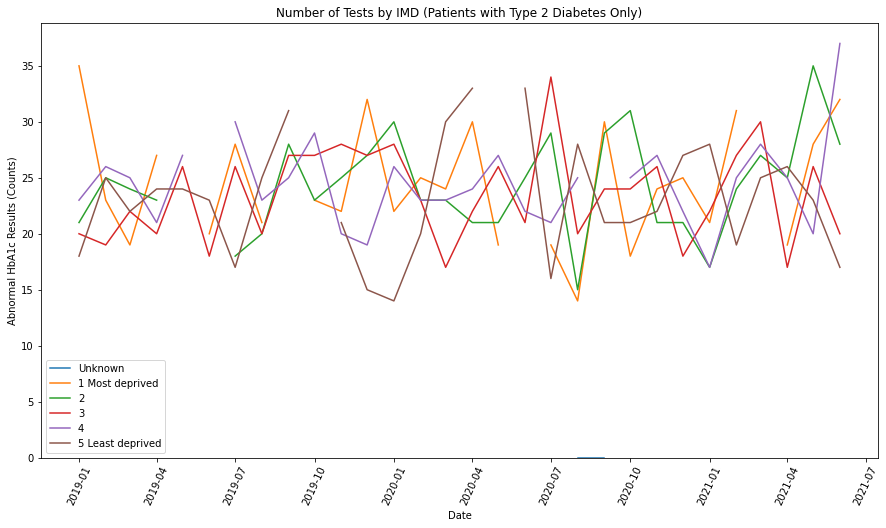

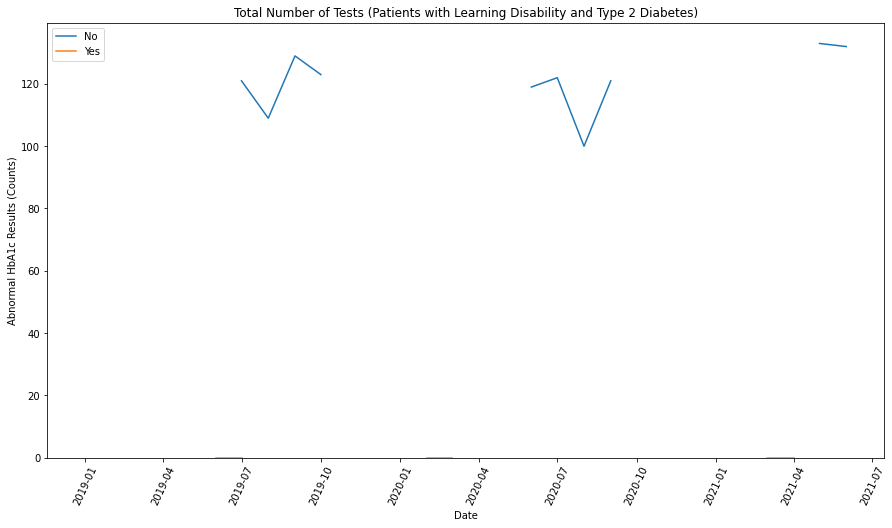

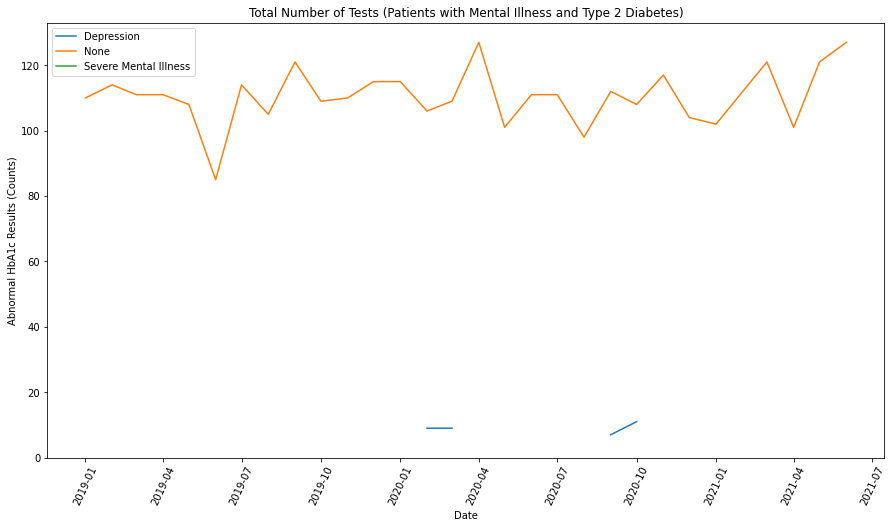

In [24]:
# Population
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Number of Tests (Patients with Type 2 Diabetes Only)',
             'population', df_pop_t2, y_min_t2)

# Age
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Age (Patients with Type 2 Diabetes Only)',
             'age_group', df_age_t2.loc[(df_age_t2.age_group != 'missing')], 
             y_min_t2)

# Sex
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Sex (Patients with Type 2 Diabetes Only)',
             'sex', df_sex_t2.loc[df_sex_t2.sex.isin(['F','M'])], y_min_t2)

# Ethnicity
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Ethnicity (Patients with Type 2 Diabetes Only)',
             'ethnicity', df_eth_t2, y_min_t2)

# Region
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Region (Patients with Type 2 Diabetes Only)',
             'region', df_region_t2, y_min_t2)

# IMD
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by IMD (Patients with Type 2 Diabetes Only)',
             'imd', df_imd_t2, y_min_t2)

# Learning Disability
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Total Number of Tests (Patients with Learning Disability and Type 2 Diabetes)',
             'learning_disability', df_ld_t2, y_min_t2)

# Mental Illness
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Total Number of Tests (Patients with Mental Illness and Type 2 Diabetes)',
             'mental_illness', df_mi_t2, y_min_t2)

## Percentage of Abnormal Results of All Tests (Patients with Type 2 Diabetes Only)

In [25]:
y_min_t2_pct = 60

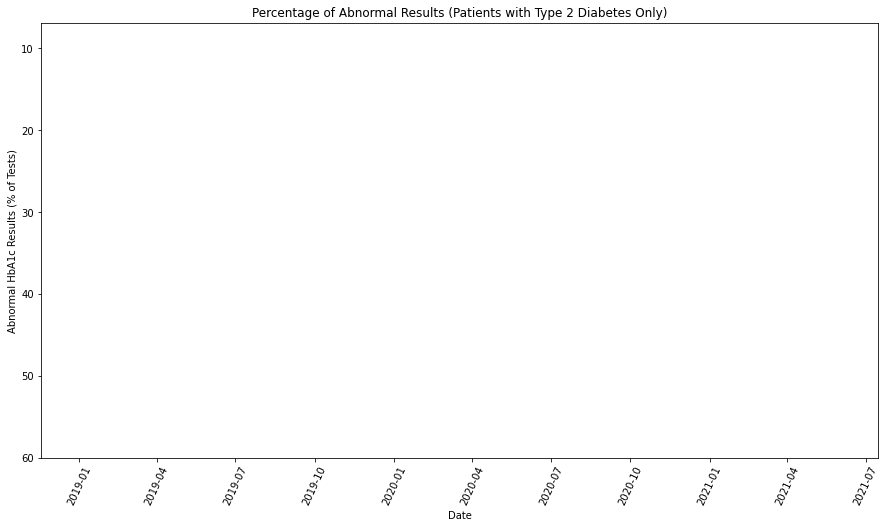

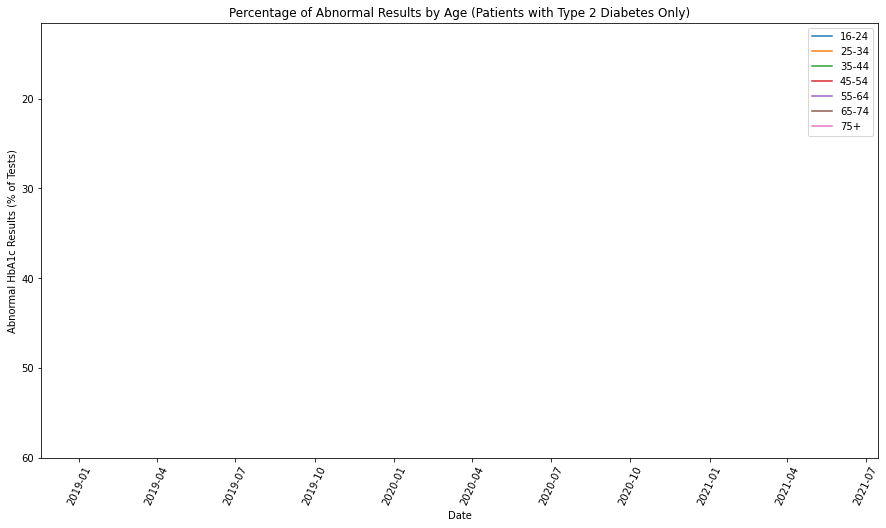

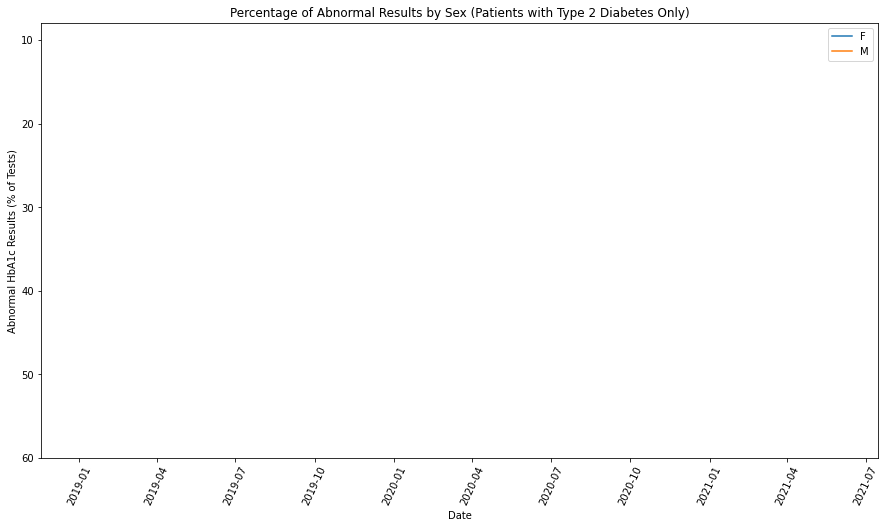

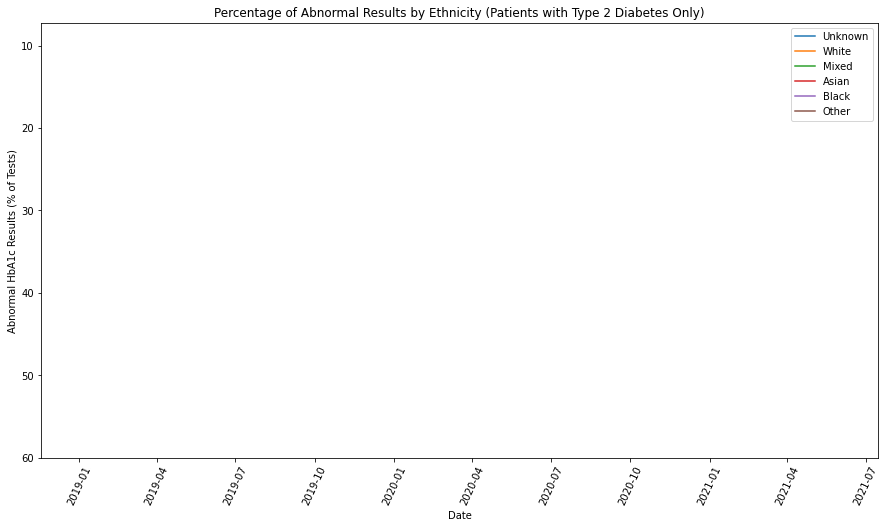

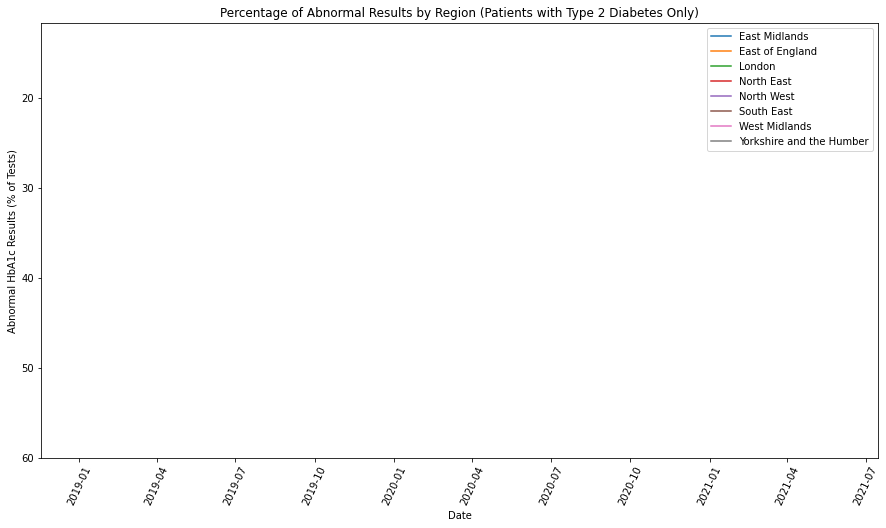

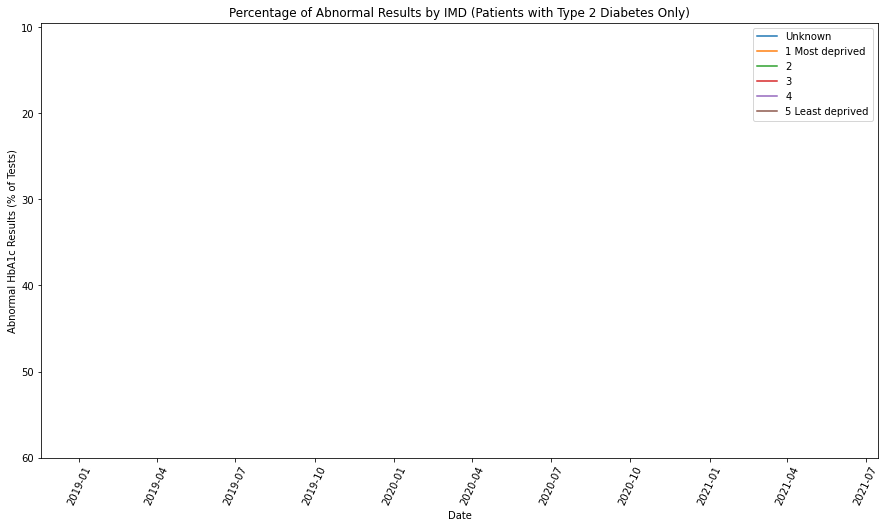

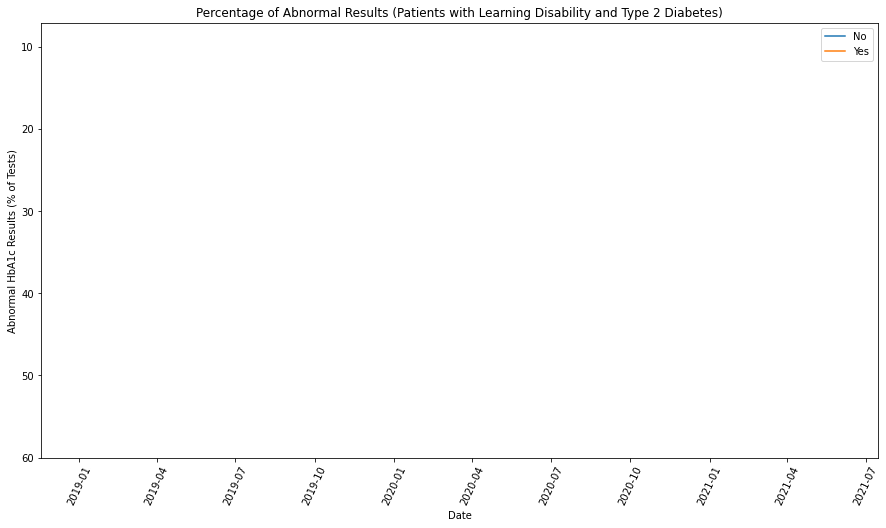

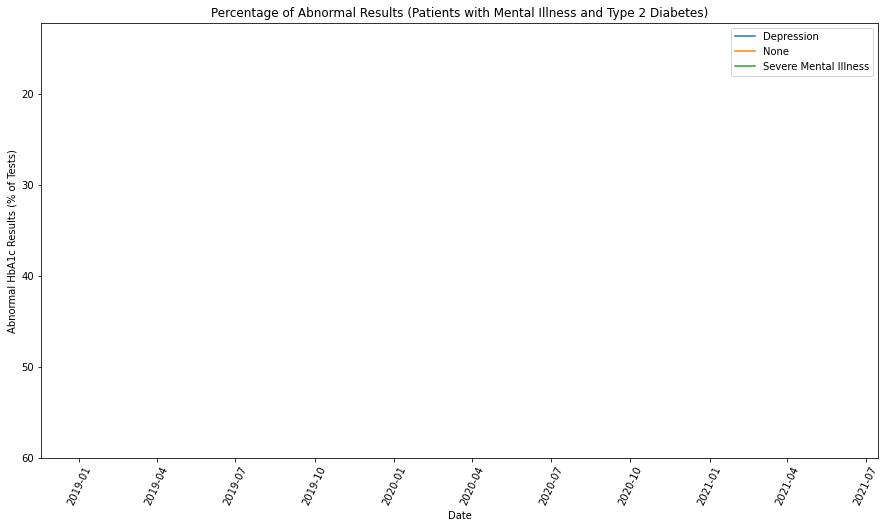

In [26]:
# Population
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (Patients with Type 2 Diabetes Only)',
             'population', df_pop_t2, y_min_t2_pct)

# Age
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Age (Patients with Type 2 Diabetes Only)',
             'age_group', df_age_t2.loc[(df_age_t2.age_group != 'missing')], 
             y_min_t2_pct)

# Sex
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Sex (Patients with Type 2 Diabetes Only)',
             'sex', df_sex_t2.loc[df_sex_t2.sex.isin(['F','M'])], y_min_t2_pct)

# Ethnicity
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Ethnicity (Patients with Type 2 Diabetes Only)',
             'ethnicity', df_eth_t2, y_min_t2_pct)

# Region
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Region (Patients with Type 2 Diabetes Only)',
             'region', df_region_t2, y_min_t2_pct)

# IMD
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by IMD (Patients with Type 2 Diabetes Only)',
             'imd', df_imd_t2, y_min_t2_pct)

# Learning Disability
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (Patients with Learning Disability and Type 2 Diabetes)',
             'learning_disability', df_ld_t2, y_min_t2_pct)

# Mental Illness
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (Patients with Mental Illness and Type 2 Diabetes)',
             'mental_illness', df_mi_t2, y_min_t2_pct)

## Tables (Patients with Type 2 Diabetes Only)

In [27]:
measures = ['hba1c_abnormal', 'population', 'pct']

# Population
display(df_pop_t2[['date'] + measures])

# Age
display(df_age_t2[['date', 'age_group'] + measures])

# Sex
display(df_sex_t2[['date', 'sex'] + measures])

# Ethnicity
display(df_eth_t2[['date', 'ethnicity'] + measures])

# Region
display(df_region_t2[['date', 'region'] + measures])

# IMD
display(df_imd_t2[['date', 'imd'] + measures])

# LD
display(df_ld_t2[['date', 'learning_disability'] + measures])

# Mental Illness
display(df_mi_t2[['date', 'mental_illness'] + measures])

date  hba1c_abnormal  population       pct
1  2019-01-01           120.0        2011  5.967181
3  2019-02-01           121.0        1996  6.062124
5  2019-03-01           114.0        2021  5.640772
7  2019-04-01           119.0        2023  5.882353
9  2019-05-01           117.0        1990  5.879397
11 2019-06-01            92.0        2041  4.507594
13 2019-07-01           121.0        2039  5.934282
15 2019-08-01           111.0        1993  5.569493
17 2019-09-01           131.0        2007  6.527155
19 2019-10-01           123.0        2095  5.871122
21 2019-11-01           116.0        2048  5.664062
23 2019-12-01           124.0        2086  5.944391
25 2020-01-01           121.0        1995  6.065163
27 2020-02-01           117.0        2005  5.835411
29 2020-03-01           119.0        1986  5.991944
31 2020-04-01           131.0        1998  6.556557
33 2020-05-01           112.0        1999  5.602801
35 2020-06-01           121.0        2065  5.859564
37 2020-07-01           122.0        2015  6.054591
39 2020-08-01           102.0        2004  5.089820
41 2020-09-01           122.0        2006  6.081755
43 2020-10-01           122.0        1953  6.246800
45 2020-11-01           122.0        2069  5.896568
47 2020-12-01           114.0        1999  5.702851
49 2021-01-01           110.0        1999  5.502751
51 2021-02-01           128.0        1972  6.490872
53 2021-03-01           131.0        2066  6.340755
55 2021-04-01           113.0        2053  5.504140
57 2021-05-01           134.0        1991  6.730286
59 2021-06-01           134.0        1984  6.754032

date age_group  hba1c_abnormal  population        pct
3   2019-01-01     16-24            12.0         209   5.741627
5   2019-01-01     25-34             NaN         196        NaN
7   2019-01-01     35-44            14.0         312   4.487179
9   2019-01-01     45-54            18.0         193   9.326425
11  2019-01-01     55-64            16.0         214   7.476636
13  2019-01-01     65-74            11.0         215   5.116279
15  2019-01-01       75+            12.0         238   5.042017
17  2019-01-01   missing             NaN          33        NaN
21  2019-02-01     16-24            11.0         207   5.314010
23  2019-02-01     25-34             9.0         197   4.568528
25  2019-02-01     35-44            20.0         278   7.194245
27  2019-02-01     45-54            17.0         213   7.981221
29  2019-02-01     55-64             9.0         202   4.455446
31  2019-02-01     65-74            17.0         205   8.292683
33  2019-02-01       75+            23.0         247   9.311741
35  2019-02-01   missing             0.0          41   0.000000
39  2019-03-01     16-24            12.0         210   5.714286
41  2019-03-01     25-34            12.0         177   6.779661
43  2019-03-01     35-44            18.0         314   5.732484
45  2019-03-01     45-54             NaN         209        NaN
47  2019-03-01     55-64            12.0         183   6.557377
49  2019-03-01     65-74            12.0         218   5.504587
51  2019-03-01       75+            18.0         268   6.716418
53  2019-03-01   missing             NaN          55        NaN
57  2019-04-01     16-24             NaN         200        NaN
59  2019-04-01     25-34            11.0         194   5.670103
61  2019-04-01     35-44            17.0         337   5.044510
63  2019-04-01     45-54            12.0         182   6.593407
65  2019-04-01     55-64             NaN         183        NaN
67  2019-04-01     65-74            11.0         196   5.612245
69  2019-04-01       75+            14.0         276   5.072464
71  2019-04-01   missing             NaN          47        NaN
75  2019-05-01     16-24             NaN         166        NaN
77  2019-05-01     25-34            14.0         204   6.862745
79  2019-05-01     35-44            17.0         310   5.483871
81  2019-05-01     45-54            13.0         184   7.065217
83  2019-05-01     55-64            10.0         226   4.424779
85  2019-05-01     65-74            15.0         198   7.575758
87  2019-05-01       75+            18.0         278   6.474820
89  2019-05-01   missing             NaN          45        NaN
93  2019-06-01     16-24             6.0         182   3.296703
95  2019-06-01     25-34             7.0         213   3.286385
97  2019-06-01     35-44            13.0         292   4.452055
99  2019-06-01     45-54             NaN         202        NaN
101 2019-06-01     55-64            15.0         207   7.246377
103 2019-06-01     65-74            11.0         196   5.612245
105 2019-06-01       75+            15.0         309   4.854369
107 2019-06-01   missing             NaN          44        NaN
111 2019-07-01     16-24            13.0         198   6.565657
113 2019-07-01     25-34             9.0         185   4.864865
115 2019-07-01     35-44            26.0         348   7.471264
117 2019-07-01     45-54            11.0         185   5.945946
119 2019-07-01     55-64             NaN         205        NaN
121 2019-07-01     65-74             9.0         205   4.390244
123 2019-07-01       75+            21.0         269   7.806691
125 2019-07-01   missing             NaN          46        NaN
129 2019-08-01     16-24            12.0         196   6.122449
131 2019-08-01     25-34             8.0         207   3.864734
133 2019-08-01     35-44            19.0         302   6.291391
135 2019-08-01     45-54             NaN         198        NaN
137 2019-08-01     55-64            11.0         184   5.978261
139 2019-08-01     65-74            16.0  

date sex  hba1c_abnormal  population       pct
1   2019-01-01   F            55.0        1011  5.440158
3   2019-01-01   M            65.0        1000  6.500000
5   2019-02-01   F            68.0        1009  6.739346
7   2019-02-01   M            53.0         987  5.369807
9   2019-03-01   F            59.0        1078  5.473098
11  2019-03-01   M            55.0         943  5.832450
13  2019-04-01   F            63.0        1029  6.122449
15  2019-04-01   M            56.0         994  5.633803
17  2019-05-01   F            57.0         979  5.822268
19  2019-05-01   M            60.0        1011  5.934718
21  2019-06-01   F            44.0        1041  4.226705
23  2019-06-01   M            48.0        1000  4.800000
25  2019-07-01   F            61.0        1062  5.743879
27  2019-07-01   M            60.0         977  6.141249
29  2019-08-01   F            58.0         996  5.823293
31  2019-08-01   M            53.0         997  5.315948
33  2019-09-01   F            72.0         998  7.214429
35  2019-09-01   M            59.0        1009  5.847374
37  2019-10-01   F            63.0        1053  5.982906
39  2019-10-01   M            60.0        1042  5.758157
41  2019-11-01   F            58.0        1069  5.425631
43  2019-11-01   M            58.0         979  5.924413
45  2019-12-01   F            68.0        1103  6.165005
47  2019-12-01   M            56.0         983  5.696846
49  2020-01-01   F            61.0        1021  5.974535
51  2020-01-01   M            60.0         974  6.160164
53  2020-02-01   F            56.0        1000  5.600000
55  2020-02-01   M            61.0        1005  6.069652
57  2020-03-01   F            56.0         989  5.662285
59  2020-03-01   M            63.0         997  6.318957
61  2020-04-01   F            67.0         990  6.767677
63  2020-04-01   M            64.0        1008  6.349206
65  2020-05-01   F            66.0        1027  6.426485
67  2020-05-01   M            46.0         972  4.732510
69  2020-06-01   F            61.0        1052  5.798479
71  2020-06-01   M            60.0        1013  5.923001
73  2020-07-01   F            74.0        1024  7.226562
75  2020-07-01   M            48.0         991  4.843592
77  2020-08-01   F            56.0        1034  5.415861
79  2020-08-01   M            46.0         970  4.742268
81  2020-09-01   F            53.0        1017  5.211406
83  2020-09-01   M            69.0         989  6.976744
85  2020-10-01   F            65.0        1031  6.304559
87  2020-10-01   M            57.0         922  6.182213
89  2020-11-01   F            66.0        1041  6.340058
91  2020-11-01   M            56.0        1028  5.447471
93  2020-12-01   F            61.0        1014  6.015779
95  2020-12-01   M            53.0         985  5.380711
97  2021-01-01   F            66.0        1023  6.451613
99  2021-01-01   M            44.0         976  4.508197
101 2021-02-01   F            76.0         980  7.755102
103 2021-02-01   M            52.0         992  5.241935
105 2021-03-01   F            76.0        1043  7.286673
107 2021-03-01   M            55.0        1023  5.376344
109 2021-04-01   F            54.0        1026  5.263158
111 2021-04-01   M            59.0        1027  5.744888
113 2021-05-01   F            67.0        1015  6.600985
115 2021-05-01   M            67.0         976  6.864754
117 2021-06-01   F            77.0        1039  7.410972
119 2021-06-01   M            57.0         945  6.031746

date ethnicity  hba1c_abnormal  population       pct
1   2019-01-01   Unknown           117.0        1928  6.068465
3   2019-01-01     White             0.0          17  0.000000
5   2019-01-01     Mixed             NaN          17       NaN
7   2019-01-01     Asian             0.0          22  0.000000
9   2019-01-01     Black             NaN          11       NaN
11  2019-01-01     Other             NaN          16       NaN
13  2019-02-01   Unknown           118.0        1915  6.161880
15  2019-02-01     White             0.0          27  0.000000
17  2019-02-01     Mixed             0.0           8  0.000000
19  2019-02-01     Asian             NaN          13       NaN
21  2019-02-01     Black             NaN          18       NaN
23  2019-02-01     Other             NaN          15       NaN
25  2019-03-01   Unknown           109.0        1934  5.635988
27  2019-03-01     White             0.0          13  0.000000
29  2019-03-01     Mixed             NaN          22       NaN
31  2019-03-01     Asian             NaN          19       NaN
33  2019-03-01     Black             0.0          16  0.000000
35  2019-03-01     Other             0.0          17  0.000000
37  2019-04-01   Unknown           112.0        1959  5.717203
39  2019-04-01     White             NaN          12       NaN
41  2019-04-01     Mixed             NaN          11       NaN
43  2019-04-01     Asian             NaN          10       NaN
45  2019-04-01     Black             NaN          14       NaN
47  2019-04-01     Other             NaN          17       NaN
49  2019-05-01   Unknown           114.0        1920  5.937500
51  2019-05-01     White             0.0          23  0.000000
53  2019-05-01     Mixed             NaN          12       NaN
55  2019-05-01     Asian             0.0          13  0.000000
57  2019-05-01     Black             NaN          12       NaN
59  2019-05-01     Other             NaN          10       NaN
61  2019-06-01   Unknown            90.0        1952  4.610656
63  2019-06-01     White             0.0          16  0.000000
65  2019-06-01     Mixed             NaN          28       NaN
67  2019-06-01     Asian             NaN          15       NaN
69  2019-06-01     Black             0.0          19  0.000000
71  2019-06-01     Other             0.0          11  0.000000
73  2019-07-01   Unknown           116.0        1956  5.930470
75  2019-07-01     White             NaN          17       NaN
77  2019-07-01     Mixed             NaN          12       NaN
79  2019-07-01     Asian             NaN          11       NaN
81  2019-07-01     Black             NaN          20       NaN
83  2019-07-01     Other             0.0          23  0.000000
85  2019-08-01   Unknown           105.0        1899  5.529226
87  2019-08-01     White             NaN          20       NaN
89  2019-08-01     Mixed             0.0          16  0.000000
91  2019-08-01     Asian             NaN          22       NaN
93  2019-08-01     Black             NaN          13       NaN
95  2019-08-01     Other             NaN          23       NaN
97  2019-09-01   Unknown           126.0        1918  6.569343
99  2019-09-01     White             0.0          13  0.000000
101 2019-09-01     Mixed             NaN          13       NaN
103 2019-09-01     Asian             NaN          25       NaN
105 2019-09-01     Black             0.0          19  0.000000
107 2019-09-01     Other             NaN          19       NaN
109 2019-10-01   Unknown           115.0        1998  5.755756
111 2019-10-01     White             NaN          26       NaN
113 2019-10-01     Mixed             NaN          24       NaN
115 2019-10-01     Asian             NaN          11       NaN
117 2019-10-01     Black             NaN          16       NaN
119 2019-10-01     Other             NaN          20       NaN
121 2019-11-01   Unknown           105.0        1958  5.362615
123 2019-11-01     White             0.0          20  0.000000
125 2019-11-01     Mixed             NaN 

date                    region  hba1c_abnormal  population  \
1   2019-01-01                       NaN            20.0         395   
3   2019-01-01             East Midlands             8.0         153   
5   2019-01-01           East of England            12.0         167   
7   2019-01-01                    London            27.0         331   
9   2019-01-01                North East            10.0         166   
11  2019-01-01                North West            11.0         161   
13  2019-01-01                South East            11.0         291   
15  2019-01-01             West Midlands            12.0         180   
17  2019-01-01  Yorkshire and the Humber             9.0         167   
19  2019-02-01                       NaN            20.0         360   
21  2019-02-01             East Midlands            14.0         153   
23  2019-02-01           East of England             7.0         152   
25  2019-02-01                    London            12.0         308   
27  2019-02-01                North East            12.0         165   
29  2019-02-01                North West            14.0         173   
31  2019-02-01                South East            25.0         316   
33  2019-02-01             West Midlands             9.0         172   
35  2019-02-01  Yorkshire and the Humber             8.0         197   
37  2019-03-01                       NaN            28.0         397   
39  2019-03-01             East Midlands             8.0         152   
41  2019-03-01           East of England             NaN         175   
43  2019-03-01                    London            18.0         298   
45  2019-03-01                North East             8.0         179   
47  2019-03-01                North West             NaN         154   
49  2019-03-01                South East            21.0         336   
51  2019-03-01             West Midlands             8.0         149   
53  2019-03-01  Yorkshire and the Humber            12.0         181   
55  2019-04-01                       NaN            23.0         391   
57  2019-04-01             East Midlands            10.0         151   
59  2019-04-01           East of England             7.0         185   
61  2019-04-01                    London            18.0         313   
63  2019-04-01                North East            16.0         185   
65  2019-04-01                North West            14.0         172   
67  2019-04-01                South East            14.0         318   
69  2019-04-01             West Midlands             8.0         150   
71  2019-04-01  Yorkshire and the Humber             9.0         158   
73  2019-05-01                       NaN            29.0         435   
75  2019-05-01             East Midlands            10.0         154   
77  2019-05-01           East of England             NaN         153   
79  2019-05-01                    London            16.0         290   
81  2019-05-01                North East             9.0         148   
83  2019-05-01                North West             NaN         159   
85  2019-05-01                South East            18.0         320   
87  2019-05-01             West Midlands            12.0         175   
89  2019-05-01  Yorkshire and the Humber            13.0         156   
91  2019-06-01                       NaN            21.0         439   
93  2019-06-01             East Midlands             NaN         149   
95  2019-06-01           East of England             8.0         142   
97  2019-06-01                    London            15.0         320   
99  2019-06-01                North East            11.0         166   
101 2019-06-01                North West             7.0         164   
103 2019-06-01                South East            15.0         326   
105 2019-06-01             West Midlands             NaN         182   
107 2019-06-01  Yorkshire and the Humber             6.0         153   
109 2019-07-01                       NaN          

date               imd  hba1c_abnormal  population       pct
1   2019-01-01           Unknown             NaN          27       NaN
3   2019-01-01   1 Most deprived            35.0         426  8.215962
5   2019-01-01                 2            21.0         365  5.753425
7   2019-01-01                 3            20.0         397  5.037783
9   2019-01-01                 4            23.0         433  5.311778
11  2019-01-01  5 Least deprived            18.0         363  4.958678
13  2019-02-01           Unknown             NaN          16       NaN
15  2019-02-01   1 Most deprived            23.0         405  5.679012
17  2019-02-01                 2            25.0         395  6.329114
19  2019-02-01                 3            19.0         392  4.846939
21  2019-02-01                 4            26.0         401  6.483791
23  2019-02-01  5 Least deprived            25.0         387  6.459948
25  2019-03-01           Unknown             NaN          21       NaN
27  2019-03-01   1 Most deprived            19.0         395  4.810127
29  2019-03-01                 2            24.0         419  5.727924
31  2019-03-01                 3            22.0         377  5.835544
33  2019-03-01                 4            25.0         431  5.800464
35  2019-03-01  5 Least deprived            22.0         378  5.820106
37  2019-04-01           Unknown             NaN          22       NaN
39  2019-04-01   1 Most deprived            27.0         413  6.537530
41  2019-04-01                 2            23.0         424  5.424528
43  2019-04-01                 3            20.0         400  5.000000
45  2019-04-01                 4            21.0         403  5.210918
47  2019-04-01  5 Least deprived            24.0         361  6.648199
49  2019-05-01           Unknown             0.0          14  0.000000
51  2019-05-01   1 Most deprived             NaN         374       NaN
53  2019-05-01                 2             NaN         384       NaN
55  2019-05-01                 3            26.0         406  6.403941
57  2019-05-01                 4            27.0         437  6.178490
59  2019-05-01  5 Least deprived            24.0         375  6.400000
61  2019-06-01           Unknown             NaN          26       NaN
63  2019-06-01   1 Most deprived            20.0         385  5.194805
65  2019-06-01                 2             NaN         409       NaN
67  2019-06-01                 3            18.0         415  4.337349
69  2019-06-01                 4             NaN         406       NaN
71  2019-06-01  5 Least deprived            23.0         400  5.750000
73  2019-07-01           Unknown             NaN          27       NaN
75  2019-07-01   1 Most deprived            28.0         414  6.763285
77  2019-07-01                 2            18.0         416  4.326923
79  2019-07-01                 3            26.0         414  6.280193
81  2019-07-01                 4            30.0         389  7.712082
83  2019-07-01  5 Least deprived            17.0         379  4.485488
85  2019-08-01           Unknown             NaN          19       NaN
87  2019-08-01   1 Most deprived            21.0         409  5.134474
89  2019-08-01                 2            20.0         372  5.376344
91  2019-08-01                 3            20.0         400  5.000000
93  2019-08-01                 4            23.0         415  5.542169
95  2019-08-01  5 Least deprived            25.0         378  6.613757
97  2019-09-01           Unknown             0.0          26  0.000000
99  2019-09-01   1 Most deprived             NaN         406       NaN
101 2019-09-01                 2            28.0         399  7.017544
103 2019-09-01                 3            27.0         391  6.905371
105 2019-09-01                 4            25.0         409  6.112469
107 2019-09-01  5 Least deprived            31.0         376  8.244681
109 2019-10-01           Unknown             NaN          22       NaN
111 2019-10-01   1 Most deprived  

date learning_disability  hba1c_abnormal  population       pct
1   2019-01-01                  No           119.0        1997  5.958938
3   2019-01-01                 Yes             NaN          14       NaN
5   2019-02-01                  No             NaN        1980       NaN
7   2019-02-01                 Yes             NaN          16       NaN
9   2019-03-01                  No           111.0        1999  5.552776
11  2019-03-01                 Yes             NaN          22       NaN
13  2019-04-01                  No             NaN        2002       NaN
15  2019-04-01                 Yes             NaN          21       NaN
17  2019-05-01                  No           115.0        1974  5.825735
19  2019-05-01                 Yes             NaN          16       NaN
21  2019-06-01                  No             NaN        2023       NaN
23  2019-06-01                 Yes             0.0          18  0.000000
25  2019-07-01                  No           121.0        2013  6.010929
27  2019-07-01                 Yes             0.0          26  0.000000
29  2019-08-01                  No           109.0        1977  5.513404
31  2019-08-01                 Yes             NaN          16       NaN
33  2019-09-01                  No           129.0        1989  6.485671
35  2019-09-01                 Yes             NaN          18       NaN
37  2019-10-01                  No           123.0        2074  5.930569
39  2019-10-01                 Yes             0.0          21  0.000000
41  2019-11-01                  No             NaN        2029       NaN
43  2019-11-01                 Yes             NaN          19       NaN
45  2019-12-01                  No             NaN        2057       NaN
47  2019-12-01                 Yes             NaN          29       NaN
49  2020-01-01                  No           119.0        1973  6.031424
51  2020-01-01                 Yes             NaN          22       NaN
53  2020-02-01                  No             NaN        1986       NaN
55  2020-02-01                 Yes             0.0          19  0.000000
57  2020-03-01                  No             NaN        1963       NaN
59  2020-03-01                 Yes             0.0          23  0.000000
61  2020-04-01                  No             NaN        1972       NaN
63  2020-04-01                 Yes             NaN          26       NaN
65  2020-05-01                  No             NaN        1973       NaN
67  2020-05-01                 Yes             0.0          26  0.000000
69  2020-06-01                  No           119.0        2051  5.802048
71  2020-06-01                 Yes             NaN          14       NaN
73  2020-07-01                  No           122.0        1990  6.130653
75  2020-07-01                 Yes             0.0          25  0.000000
77  2020-08-01                  No           100.0        1986  5.035247
79  2020-08-01                 Yes             NaN          18       NaN
81  2020-09-01                  No           121.0        1986  6.092649
83  2020-09-01                 Yes             NaN          20       NaN
85  2020-10-01                  No             NaN        1933       NaN
87  2020-10-01                 Yes             0.0          20  0.000000
89  2020-11-01                  No             NaN        2045       NaN
91  2020-11-01                 Yes             NaN          24       NaN
93  2020-12-01                  No             NaN        1983       NaN
95  2020-12-01                 Yes             NaN          16       NaN
97  2021-01-01                  No             NaN        1980       NaN
99  2021-01-01                 Yes             0.0          19  0.000000
101 2021-02-01                  No             NaN        1947       NaN
103 2021-02-01                 Yes             NaN          25       NaN
105 2021-03-01                  No             NaN        2044       NaN
107 2021-03-01                 Yes             0.0          22  0.00

date         mental_illness  hba1c_abnormal  population        pct
1   2019-01-01             Depression             NaN          91        NaN
3   2019-01-01                   None           110.0        1863   5.904455
5   2019-01-01  Severe Mental Illness             NaN          57        NaN
7   2019-02-01             Depression             NaN         104        NaN
9   2019-02-01                   None           114.0        1862   6.122449
11  2019-02-01  Severe Mental Illness             NaN          30        NaN
13  2019-03-01             Depression             NaN          85        NaN
15  2019-03-01                   None           111.0        1896   5.854430
17  2019-03-01  Severe Mental Illness             NaN          40        NaN
19  2019-04-01             Depression             NaN         111        NaN
21  2019-04-01                   None           111.0        1875   5.920000
23  2019-04-01  Severe Mental Illness             NaN          37        NaN
25  2019-05-01             Depression             NaN         107        NaN
27  2019-05-01                   None           108.0        1852   5.831533
29  2019-05-01  Severe Mental Illness             NaN          31        NaN
31  2019-06-01             Depression             NaN          86        NaN
33  2019-06-01                   None            85.0        1923   4.420177
35  2019-06-01  Severe Mental Illness             NaN          32        NaN
37  2019-07-01             Depression             NaN          91        NaN
39  2019-07-01                   None           114.0        1911   5.965463
41  2019-07-01  Severe Mental Illness             NaN          37        NaN
43  2019-08-01             Depression             NaN         103        NaN
45  2019-08-01                   None           105.0        1854   5.663430
47  2019-08-01  Severe Mental Illness             NaN          36        NaN
49  2019-09-01             Depression             NaN          98        NaN
51  2019-09-01                   None           121.0        1873   6.460224
53  2019-09-01  Severe Mental Illness             NaN          36        NaN
55  2019-10-01             Depression             NaN         119        NaN
57  2019-10-01                   None           109.0        1934   5.635988
59  2019-10-01  Severe Mental Illness             NaN          42        NaN
61  2019-11-01             Depression             NaN         113        NaN
63  2019-11-01                   None           110.0        1884   5.838641
65  2019-11-01  Severe Mental Illness             NaN          51        NaN
67  2019-12-01             Depression             NaN          97        NaN
69  2019-12-01                   None           115.0        1950   5.897436
71  2019-12-01  Severe Mental Illness             NaN          39        NaN
73  2020-01-01             Depression             NaN          88        NaN
75  2020-01-01                   None           115.0        1869   6.153023
77  2020-01-01  Severe Mental Illness             NaN          38        NaN
79  2020-02-01             Depression             9.0          83  10.843373
81  2020-02-01                   None           106.0        1892   5.602537
83  2020-02-01  Severe Mental Illness             NaN          30        NaN
85  2020-03-01             Depression             9.0         121   7.438017
87  2020-03-01                   None           109.0        1833   5.946536
89  2020-03-01  Severe Mental Illness             NaN          32        NaN
91  2020-04-01             Depression             NaN          78        NaN
93  2020-04-01                   None           127.0        1882   6.748140
95  2020-04-01  Severe Mental Illness             NaN          38        NaN
97  2020-05-01             Depression             7.0          97   7.216495
99  2020-05-01                   None           101.0        1861   5.427190
101 2020-05-01  Severe Mental Illness             NaN          41        NaN
103 20